In this notebook, I will perform SNP overrepresentation analysis on the \
endothelial eGRN data that were generated for a select list of target genes\
that were of high average expression in pseudibulked endothelial cells\
in the Zhu et al brain dataset.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [3]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [4]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [5]:
library(Signac)

In [6]:
library(Pando)


Attaching package: ‘Pando’


The following objects are masked from ‘package:Seurat’:

    GetAssay, VariableFeatures


The following objects are masked from ‘package:SeuratObject’:

    LayerData, VariableFeatures




In [10]:
list.files(here::here('R_Objects')) %>% print

 [1] "DE_data_sig_EC.RDS"                  
 [2] "EC_detected_peaks_min1.RDS"          
 [3] "EC_detected_peaks_min5.RDS"          
 [4] "endothelial_genes_subsetted.RDS"     
 [5] "endothelial_genes.RDS"               
 [6] "important_TFs_EC_min1.RDS"           
 [7] "important_TFs_EC_min5.RDS"           
 [8] "Zhu_et_al_eGRNs_combined.RDS"        
 [9] "Zhu_et_al_Pando_w_eGRNs_SLURM_c1.RDS"
[10] "Zhu_et_al_Pando_w_eGRNs_SLURM_c2.RDS"
[11] "Zhu_et_al_Pando_w_eGRNs_SLURM_c3.RDS"
[12] "Zhu_et_al_Pando_w_eGRNs_SLURM_c4.RDS"
[13] "Zhu_et_al_Pando_w_eGRNs_SLURM_c5.RDS"
[14] "Zhu_et_al_Pando_w_eGRNs_SLURM_c6.RDS"
[15] "Zhu_et_al_Pando_w_motifs.RDS"        


In [11]:
Zhu_et_al_eGRNs <- readRDS(here::here("R_Objects", "Zhu_et_al_eGRNs_combined.RDS"))

In [12]:
Zhu_et_al_eGRNs

An object of class "GRNData"
Slot "grn":
A RegulatoryNetwork object based on 1014 transcription factors

1 inferred network: glm_network

Slot "data":
An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony


In [13]:
library(traseR)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attachi

In [14]:
data(CEU)  # all SNPs that contain both trait-associated and non-associated SNPs.

In [15]:
data(taSNP) # SNPs significantly associated with a trait.

In [16]:
# load trait associated SNPs including LD and all SNPs:

data(taSNPLD)

In [17]:
# read the R object containing the detected peaks in at least one endothelial cells:

EC_detected_peaks_min1 <- readRDS(here::here("R_Objects", "EC_detected_peaks_min1.RDS"))

In [19]:
EC_detected_peaks_min1 %>% head

[1] "chr1-10063-10327"   "chr1-180726-180979" "chr1-190727-191632"
[4] "chr1-777615-779293" "chr1-816964-817422" "chr1-818686-818982"

In [23]:
EC_detected_peaks_min1 %>% 
Signac::StringToGRanges(sep = c('-','-')) %>% 
width %>% 
summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  201.0   446.0   690.0   804.8  1050.0  4207.0 

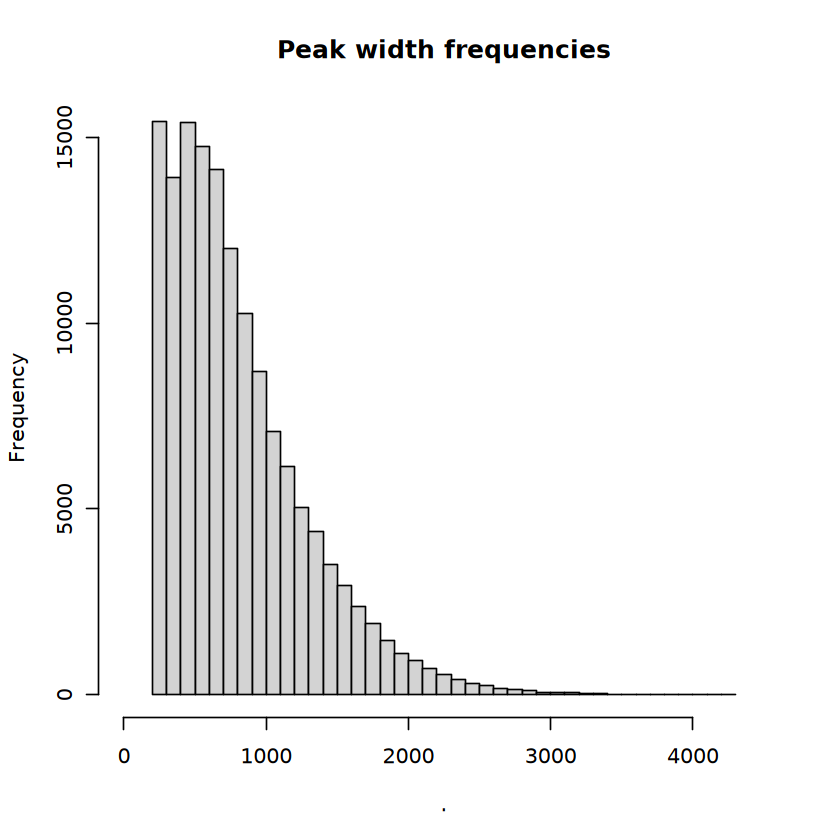

In [45]:
EC_detected_peaks_min1 %>% 
Signac::StringToGRanges(sep = c('-','-')) %>% 
width %>% 
hist(xlim = c(0, 4500), 
          breaks = 50, 
          main = 'Peak width frequencies')

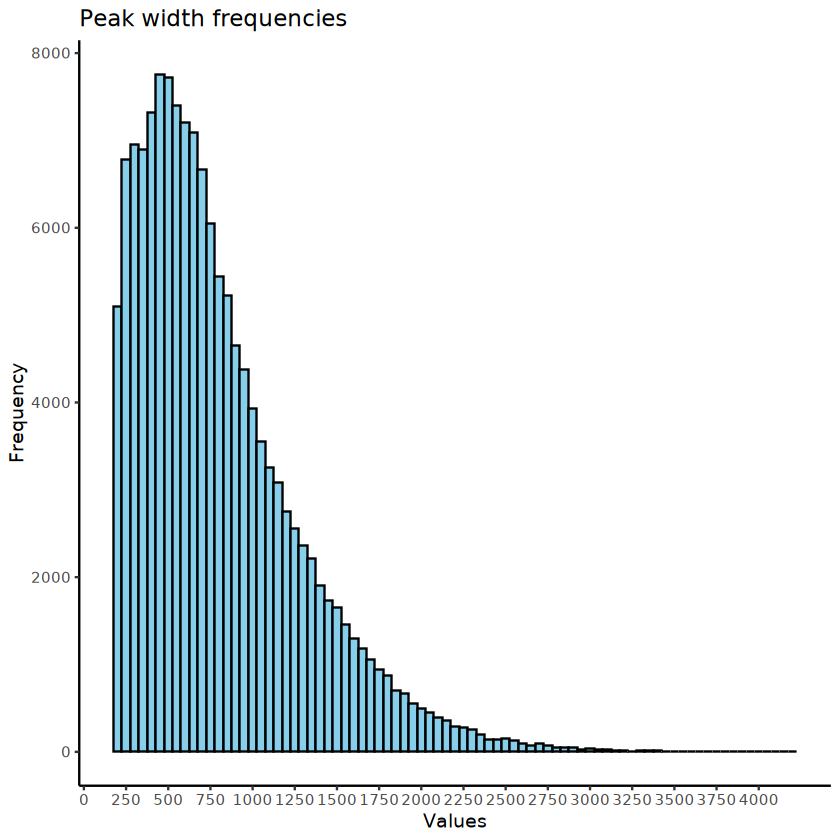

In [47]:
EC_detected_peaks_min1 %>% 
Signac::StringToGRanges(sep = c('-','-')) %>% 
width %>% 
data.frame(width = .) %>% 
ggplot(aes(x = width)) +
  geom_histogram(binwidth = 50, color = "black", fill = "skyblue") +
  labs(title = "Peak width frequencies", x = "Values", y = "Frequency") +
  scale_x_continuous(breaks = seq(0, 4000, by = 250)) +
  # Classic theme
  theme_classic()

In [48]:
EC_detected_peaks_min1 %>% 
Signac::StringToGRanges(sep = c('-','-')) %>% 
width %>% 
data.frame(width = .) %>% summary

     width       
 Min.   : 201.0  
 1st Qu.: 446.0  
 Median : 690.0  
 Mean   : 804.8  
 3rd Qu.:1050.0  
 Max.   :4207.0  

In [49]:
EC_detected_peaks_min1 %>% length

[1] 144345

In [50]:
# filter in eGRN connections for EC accessibile regions:

EC_eGRN_min1_Zhu_et_al <- Zhu_et_al_eGRNs

EC_eGRN_min1_Zhu_et_al@grn@networks$glm_network@coefs <- 
                EC_eGRN_min1_Zhu_et_al@grn@networks$glm_network@coefs %>% 
                            filter(region %in% EC_detected_peaks_min1)

In [51]:
coef(EC_eGRN_min1_Zhu_et_al) %>% dim

[1] 11159    11

In [53]:
coef(Zhu_et_al_eGRNs) %>% dim

[1] 919602     11

In [54]:
EC_eGRN_min1_Zhu_et_al  <- find_modules(
    EC_eGRN_min1_Zhu_et_al, 
    p_thresh = 0.1,
    nvar_thresh = 2, 
    min_genes_per_module = 1, 
    rsq_thresh = 0.05
)

Found 250 TF modules



In [55]:
EC_eGRN_min1_Zhu_et_al %>% NetworkModules %>% .@meta %>% head

tf    target  estimate    n_regions n_genes n_tfs regions                 
1 AEBP2 ATP2B1   0.02486657 4         10      3     chr12-89707060-89707304 
2 AEBP2 CAMK1D   0.03421972 1         10      1     chr10-12699395-12699595 
3 AEBP2 CNTNAP2  0.06680273 1         10      1     chr7-148809909-148810164
4 AEBP2 DMD      0.05752384 1         10      1     chrX-30992379-30992751  
5 AEBP2 NHSL1   -0.03879838 1         10      2     chr6-139588999-139589637
6 AEBP2 PLCB1    0.07657219 3         10      3     chr20-9945452-9945665   
  pval         padj       
1 0.0080975973 0.061764430
2 0.0006356896 0.008522961
3 0.0025240192 0.025500072
4 0.0034976167 0.032788445
5 0.0006404508 0.008575795
6 0.0033085371 0.031437162

In [56]:
EC_eGRN_min1_Zhu_et_al %>% 
    saveRDS(here::here('R_Objects', 'EC_eGRN_min1_Zhu_et_al_Pando_obj.RDS'))

In [61]:
EC_eGRN_regions_min1 <- 
    EC_eGRN_min1_Zhu_et_al %>% 
    NetworkModules() %>% 
    .@meta %>% 
    select(regions)

In [62]:
EC_eGRN_regions_min1 %>% head

regions                 
1 chr12-89707060-89707304 
2 chr10-12699395-12699595 
3 chr7-148809909-148810164
4 chrX-30992379-30992751  
5 chr6-139588999-139589637
6 chr20-9945452-9945665

In [63]:
EC_eGRN_regions_min1 <- 
    EC_eGRN_regions_min1 %>% 
    pull(regions) %>% 
    str_split(pattern = ';') %>% 
    unlist

In [64]:
EC_eGRN_regions_min1 %>% length

[1] 1247

In [66]:
EC_eGRN_regions_min1 %>% head %>% print

[1] "chr12-89707060-89707304"  "chr10-12699395-12699595" 
[3] "chr7-148809909-148810164" "chrX-30992379-30992751"  
[5] "chr6-139588999-139589637" "chr20-9945452-9945665"   


In [67]:
EC_eGRN_regions_min1 %>% unique %>% length

[1] 744

In [68]:
EC_eGRN_regions_min1 <- EC_eGRN_regions_min1 %>% unique

In [69]:
EC_eGRN_regions_min1 %>% length

[1] 744

In [ ]:
# convert to Granges object:

In [70]:
EC_eGRN_regions_min1 <- EC_eGRN_regions_min1 %>% Signac::StringToGRanges(sep = c('-', '-'))

In [71]:
EC_eGRN_regions_min1

GRanges object with 744 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
    [1]    chr12   89707060-89707304      *
    [2]    chr10   12699395-12699595      *
    [3]     chr7 148809909-148810164      *
    [4]     chrX   30992379-30992751      *
    [5]     chr6 139588999-139589637      *
    ...      ...                 ...    ...
  [740]    chr13 106533053-106533381      *
  [741]     chr1 245649283-245649486      *
  [742]    chr16   81908929-81909220      *
  [743]    chr20   37898263-37898766      *
  [744]     chr9     3700012-3700212      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [72]:
EC_eGRN_regions_min1 %>% 
    saveRDS(here::here('R_Objects', 'EC_eGRN_regions_min1_Granges.RDS'))

In [73]:
# view distribution of widths:

EC_eGRN_regions_min1 %>% GenomicRanges::width() %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  201.0   219.0   261.0   306.6   310.2  1689.0 

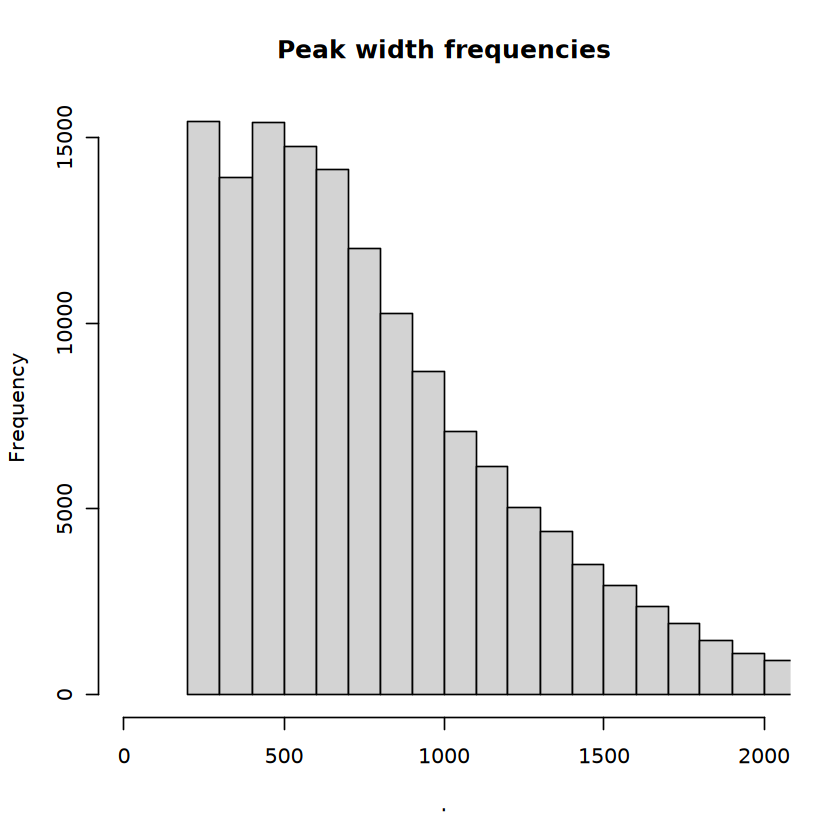

In [74]:
EC_detected_peaks_min1 %>% 
Signac::StringToGRanges(sep = c('-','-')) %>% 
width %>% 
hist(xlim = c(0, 2000), 
          breaks = 50, 
          main = 'Peak width frequencies')

In [76]:
list.files(here::here()) %>% print

 [1] "bash_scripts"                                                                           
 [2] "for_github_repo"                                                                        
 [3] "network_visualization_functions_simplified.r"                                           
 [4] "network_visualization_functions.r"                                                      
 [5] "PART_1_Prepare_endothelial_gene_list_for _Pando_eGRN_inference.ipynb"                   
 [6] "PART_2A_Exploration_of_eGRNs_for_each_chunk_of_target_genes_to_assess_consistency.ipynb"
 [7] "PART_2B_Concatanate_the_network_objects_of_chunked_genes_and_apply_FDR.ipynb"           
 [8] "PART_3_Comparison_of_Zhu_et_al_&_Mannens_et_al_endothelial_eGRNs.ipynb"                 
 [9] "R_Objects"                                                                              
[10] "SNP_enrichment_and_plotting_functions.R"                                                
[11] "Untitled.ipynb"                             

In [77]:
source(here::here('SNP_enrichment_and_plotting_functions.R'))

In [78]:
# SNP enrichment:

# NO expansion of peak regions:

EC_detected_peaks_min1_SNPs <- 
    enrich_SNP_generic(granges_obj = EC_eGRN_regions_min1,
                       expand_by = NULL,
                       SNPs = taSNPLD)

Using whole genome as background in the statistical analysis....  


There are  227367 bp in the query region, accounting for  7.48828218557676e-05  of the genome.

There are  573 traits in the analysis.

There are  33 trait class in the analysis.

100 traits have been tested!

200 traits have been tested!

300 traits have been tested!

400 traits have been tested!

500 traits have been tested!

10 trait class have been tested!

20 trait class have been tested!

30 trait class have been tested!



Using all known SNPs as background in the statistical analysis....  


There are  227367 bp in the query region, accounting for  7.48828218557676e-05  of the genome.

There are  573 traits in the analysis.

There are  33 trait class in the analysis.

100 traits have been tested!

200 traits have been tested!

300 traits have been tested!

400 traits have been tested!

500 traits have been tested!

10 trait class have been tested!

20 trait class have been tested!

30 trait class have been tested!



In [88]:
# SNP enrichment:

# 100 bp expansion of peak regions:

EC_detected_peaks_min1_SNPs_100bp <- 
    enrich_SNP_generic(granges_obj = EC_eGRN_regions_min1,
                       expand_by = 100,
                       SNPs = taSNPLD)

Using whole genome as background in the statistical analysis....  


There are  376167 bp in the query region, accounting for  0.000123889774897054  of the genome.

There are  573 traits in the analysis.

There are  33 trait class in the analysis.

100 traits have been tested!

200 traits have been tested!

300 traits have been tested!

400 traits have been tested!

500 traits have been tested!

10 trait class have been tested!

20 trait class have been tested!

30 trait class have been tested!



Using all known SNPs as background in the statistical analysis....  


There are  376167 bp in the query region, accounting for  0.000123889774897054  of the genome.

There are  573 traits in the analysis.

There are  33 trait class in the analysis.

100 traits have been tested!

200 traits have been tested!

300 traits have been tested!

400 traits have been tested!

500 traits have been tested!

10 trait class have been tested!

20 trait class have been tested!

30 trait class have been tested!



In [89]:
options(repr.plot.width = 30, repr.plot.height = 14)

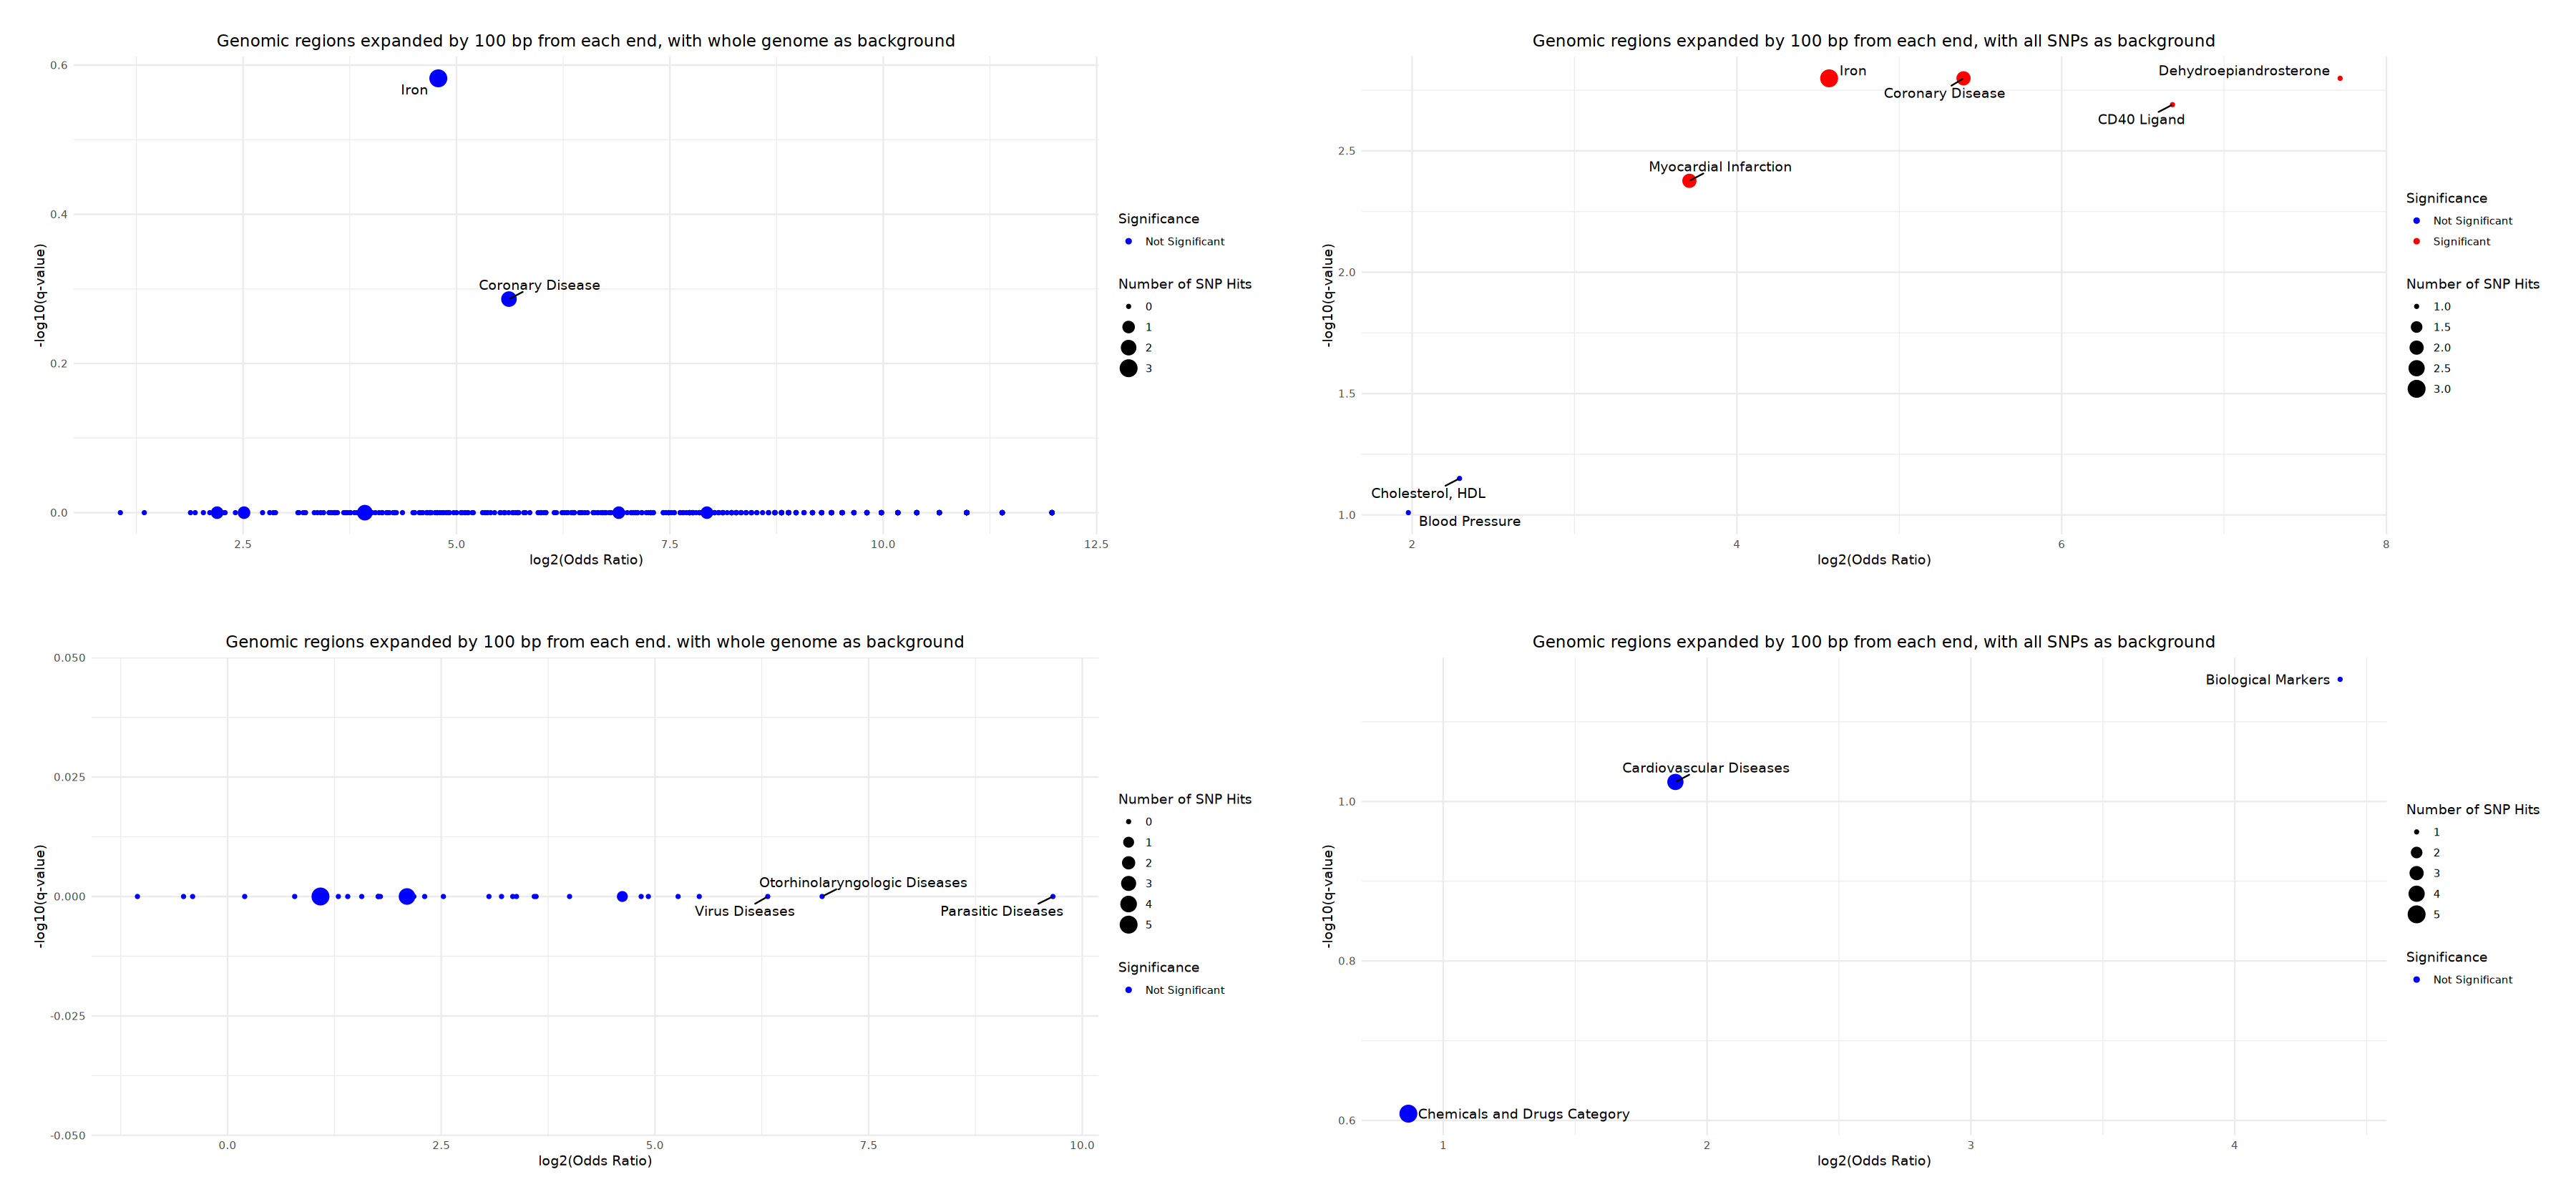

In [90]:
plot_for_diff_expansions(enriched_SNP_obj = EC_detected_peaks_min1_SNPs_100bp, expansion_value_string = '100 bp')

In [82]:
options(repr.plot.width = 30, repr.plot.height = 14)

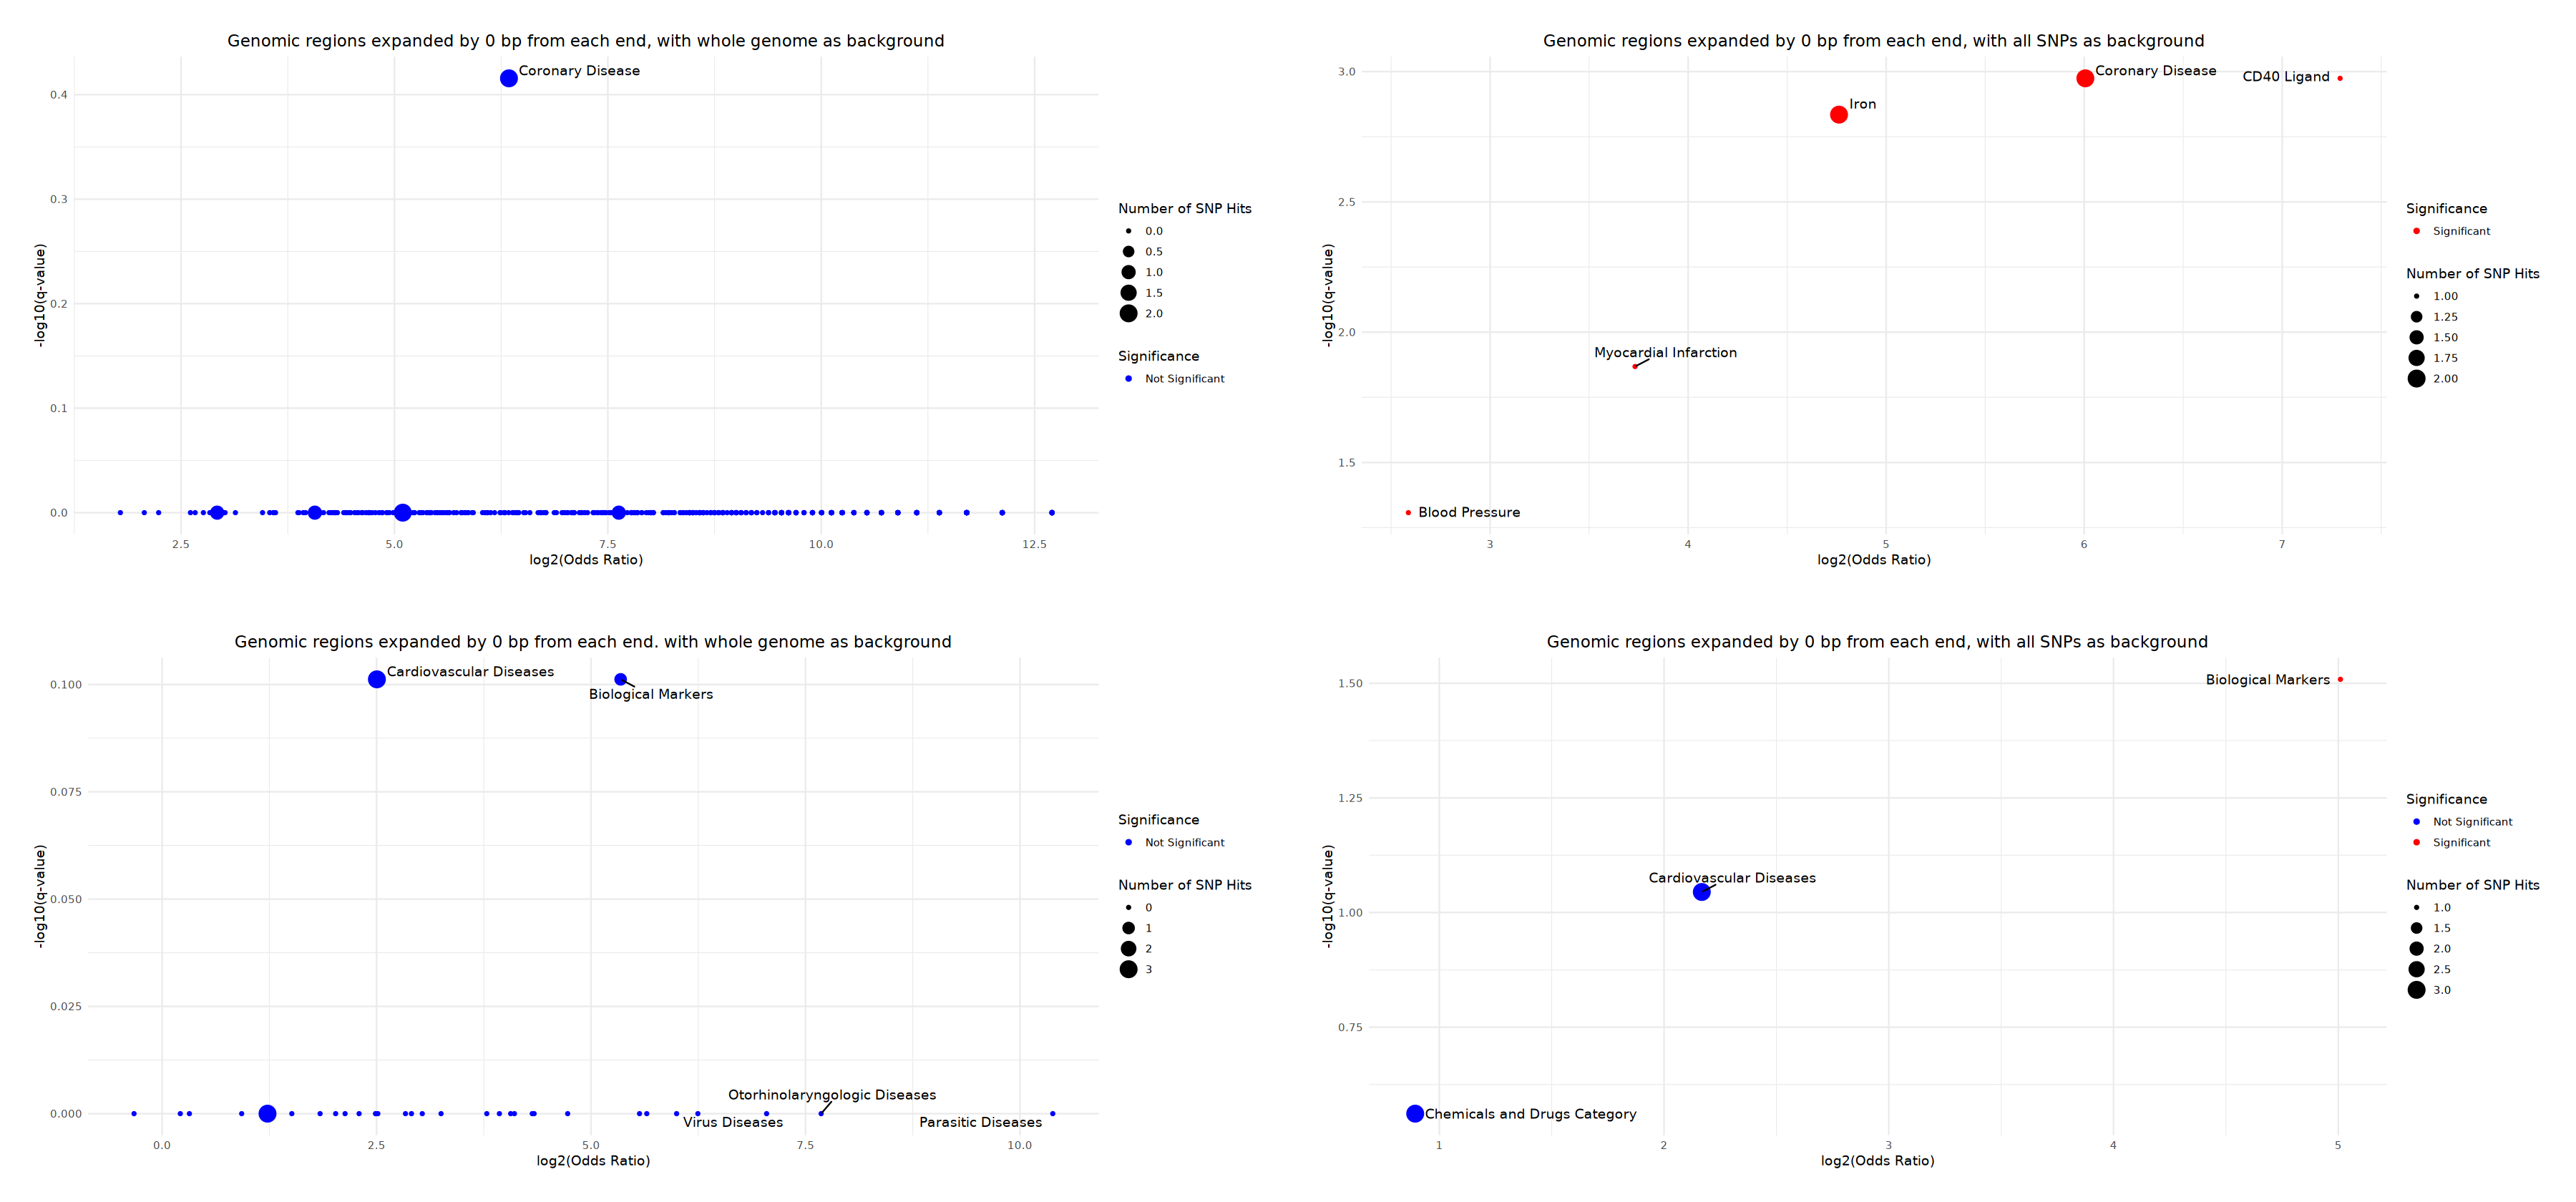

In [83]:
plot_for_diff_expansions(enriched_SNP_obj = EC_detected_peaks_min1_SNPs, expansion_value_string = '0 bp')

In [96]:
EC_eGRN_regions_min1

GRanges object with 744 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
    [1]    chr12   89707060-89707304      *
    [2]    chr10   12699395-12699595      *
    [3]     chr7 148809909-148810164      *
    [4]     chrX   30992379-30992751      *
    [5]     chr6 139588999-139589637      *
    ...      ...                 ...    ...
  [740]    chr13 106533053-106533381      *
  [741]     chr1 245649283-245649486      *
  [742]    chr16   81908929-81909220      *
  [743]    chr20   37898263-37898766      *
  [744]     chr9     3700012-3700212      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




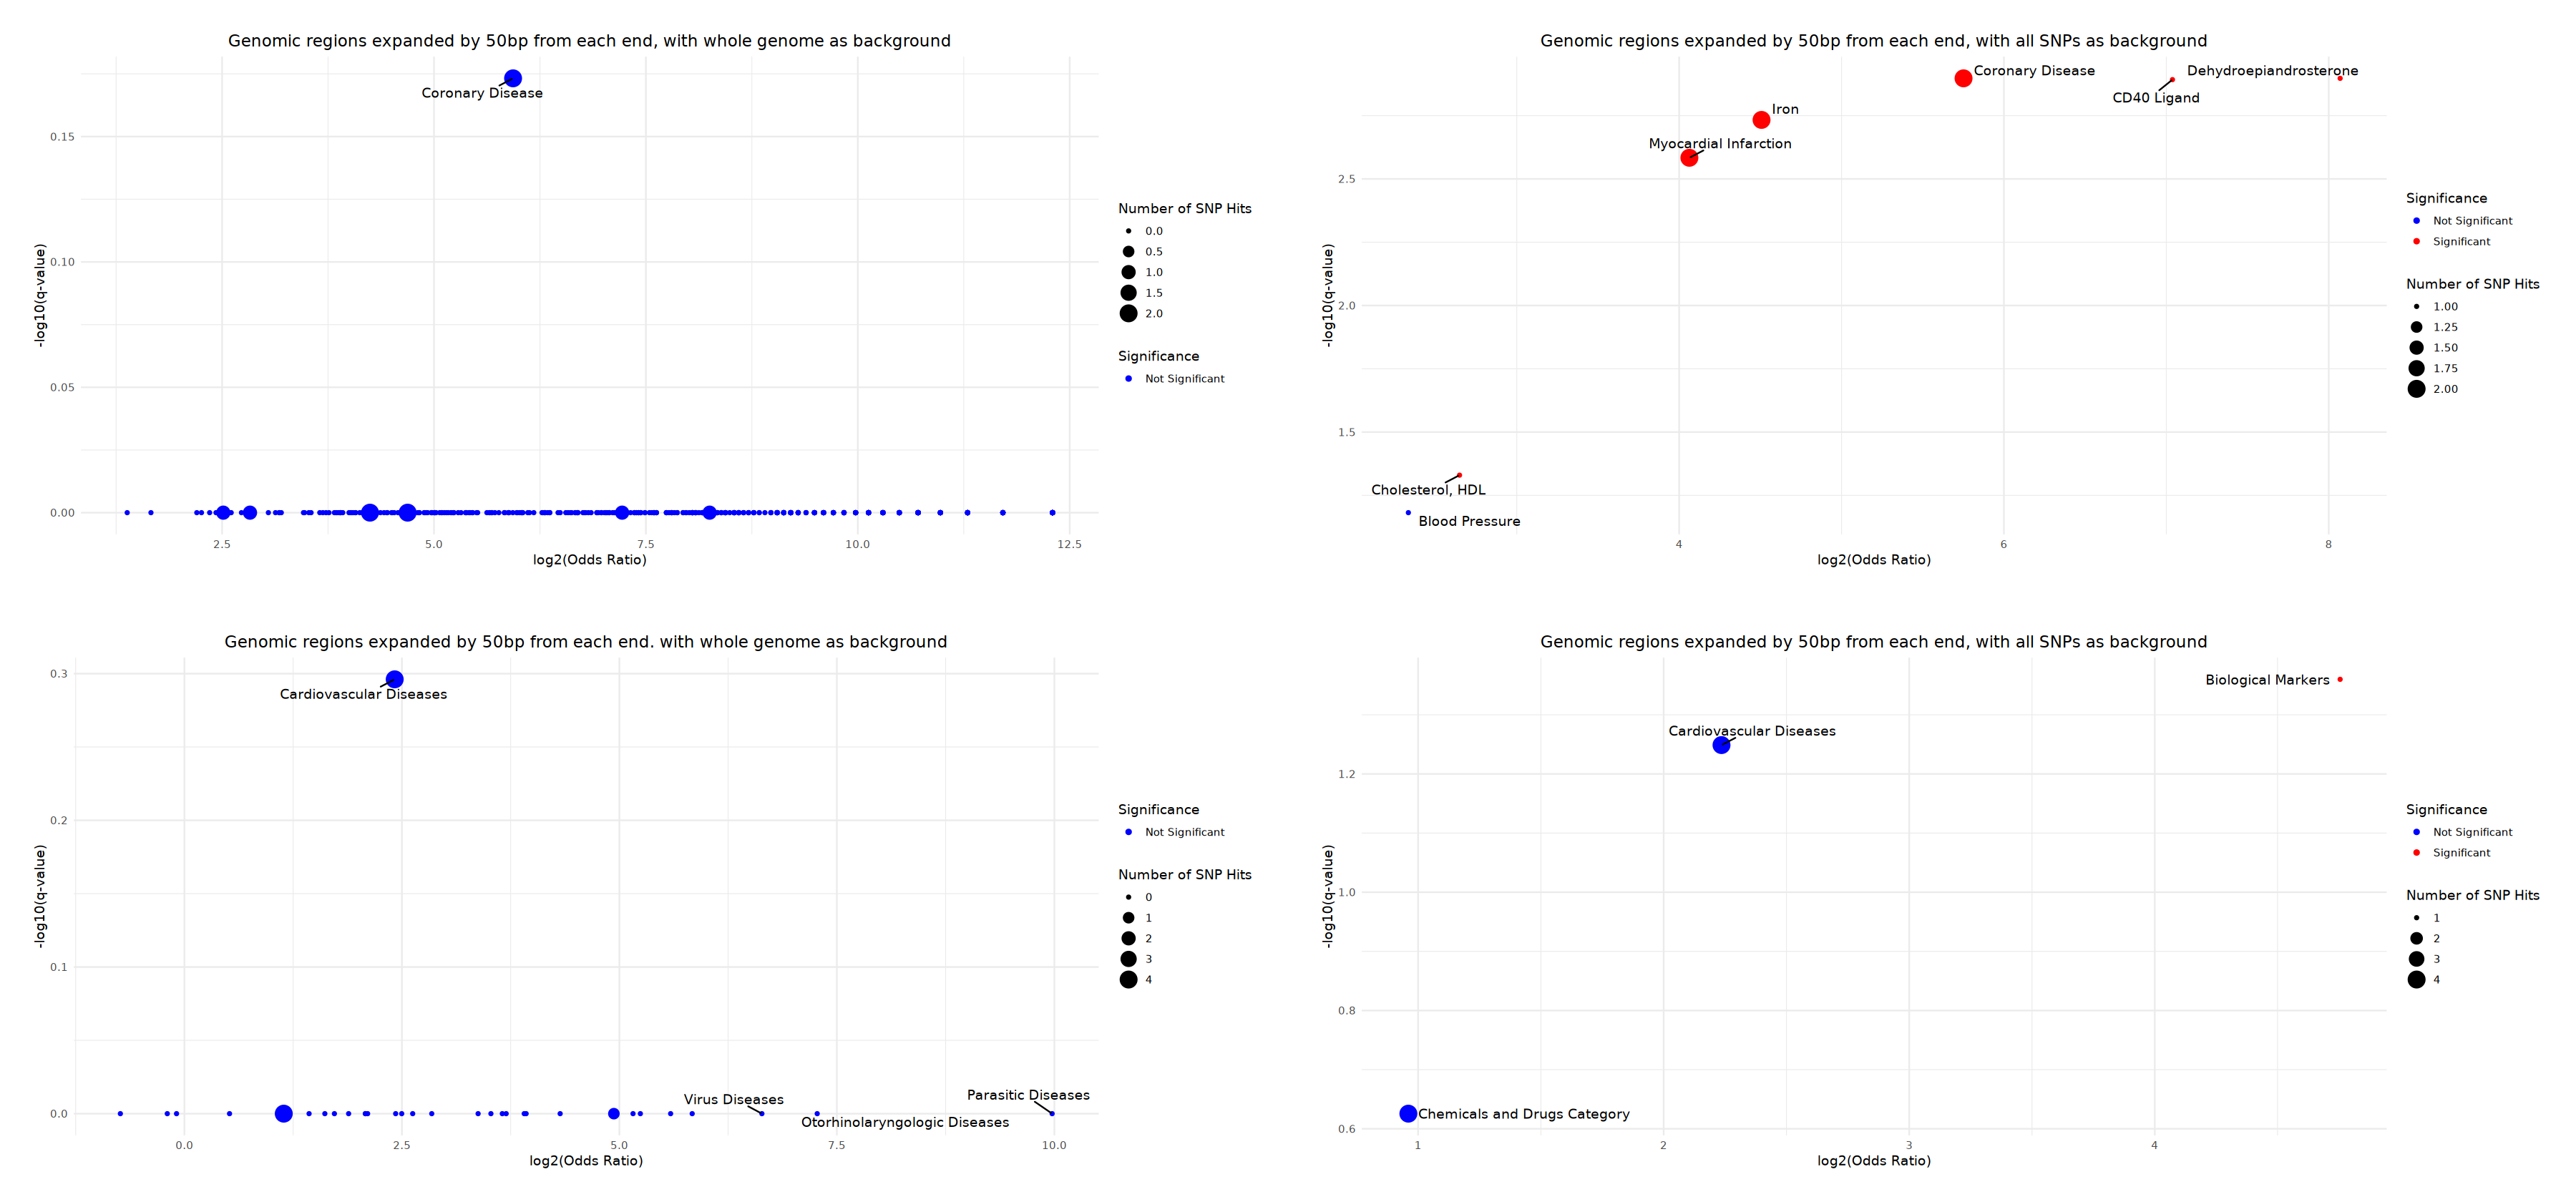

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




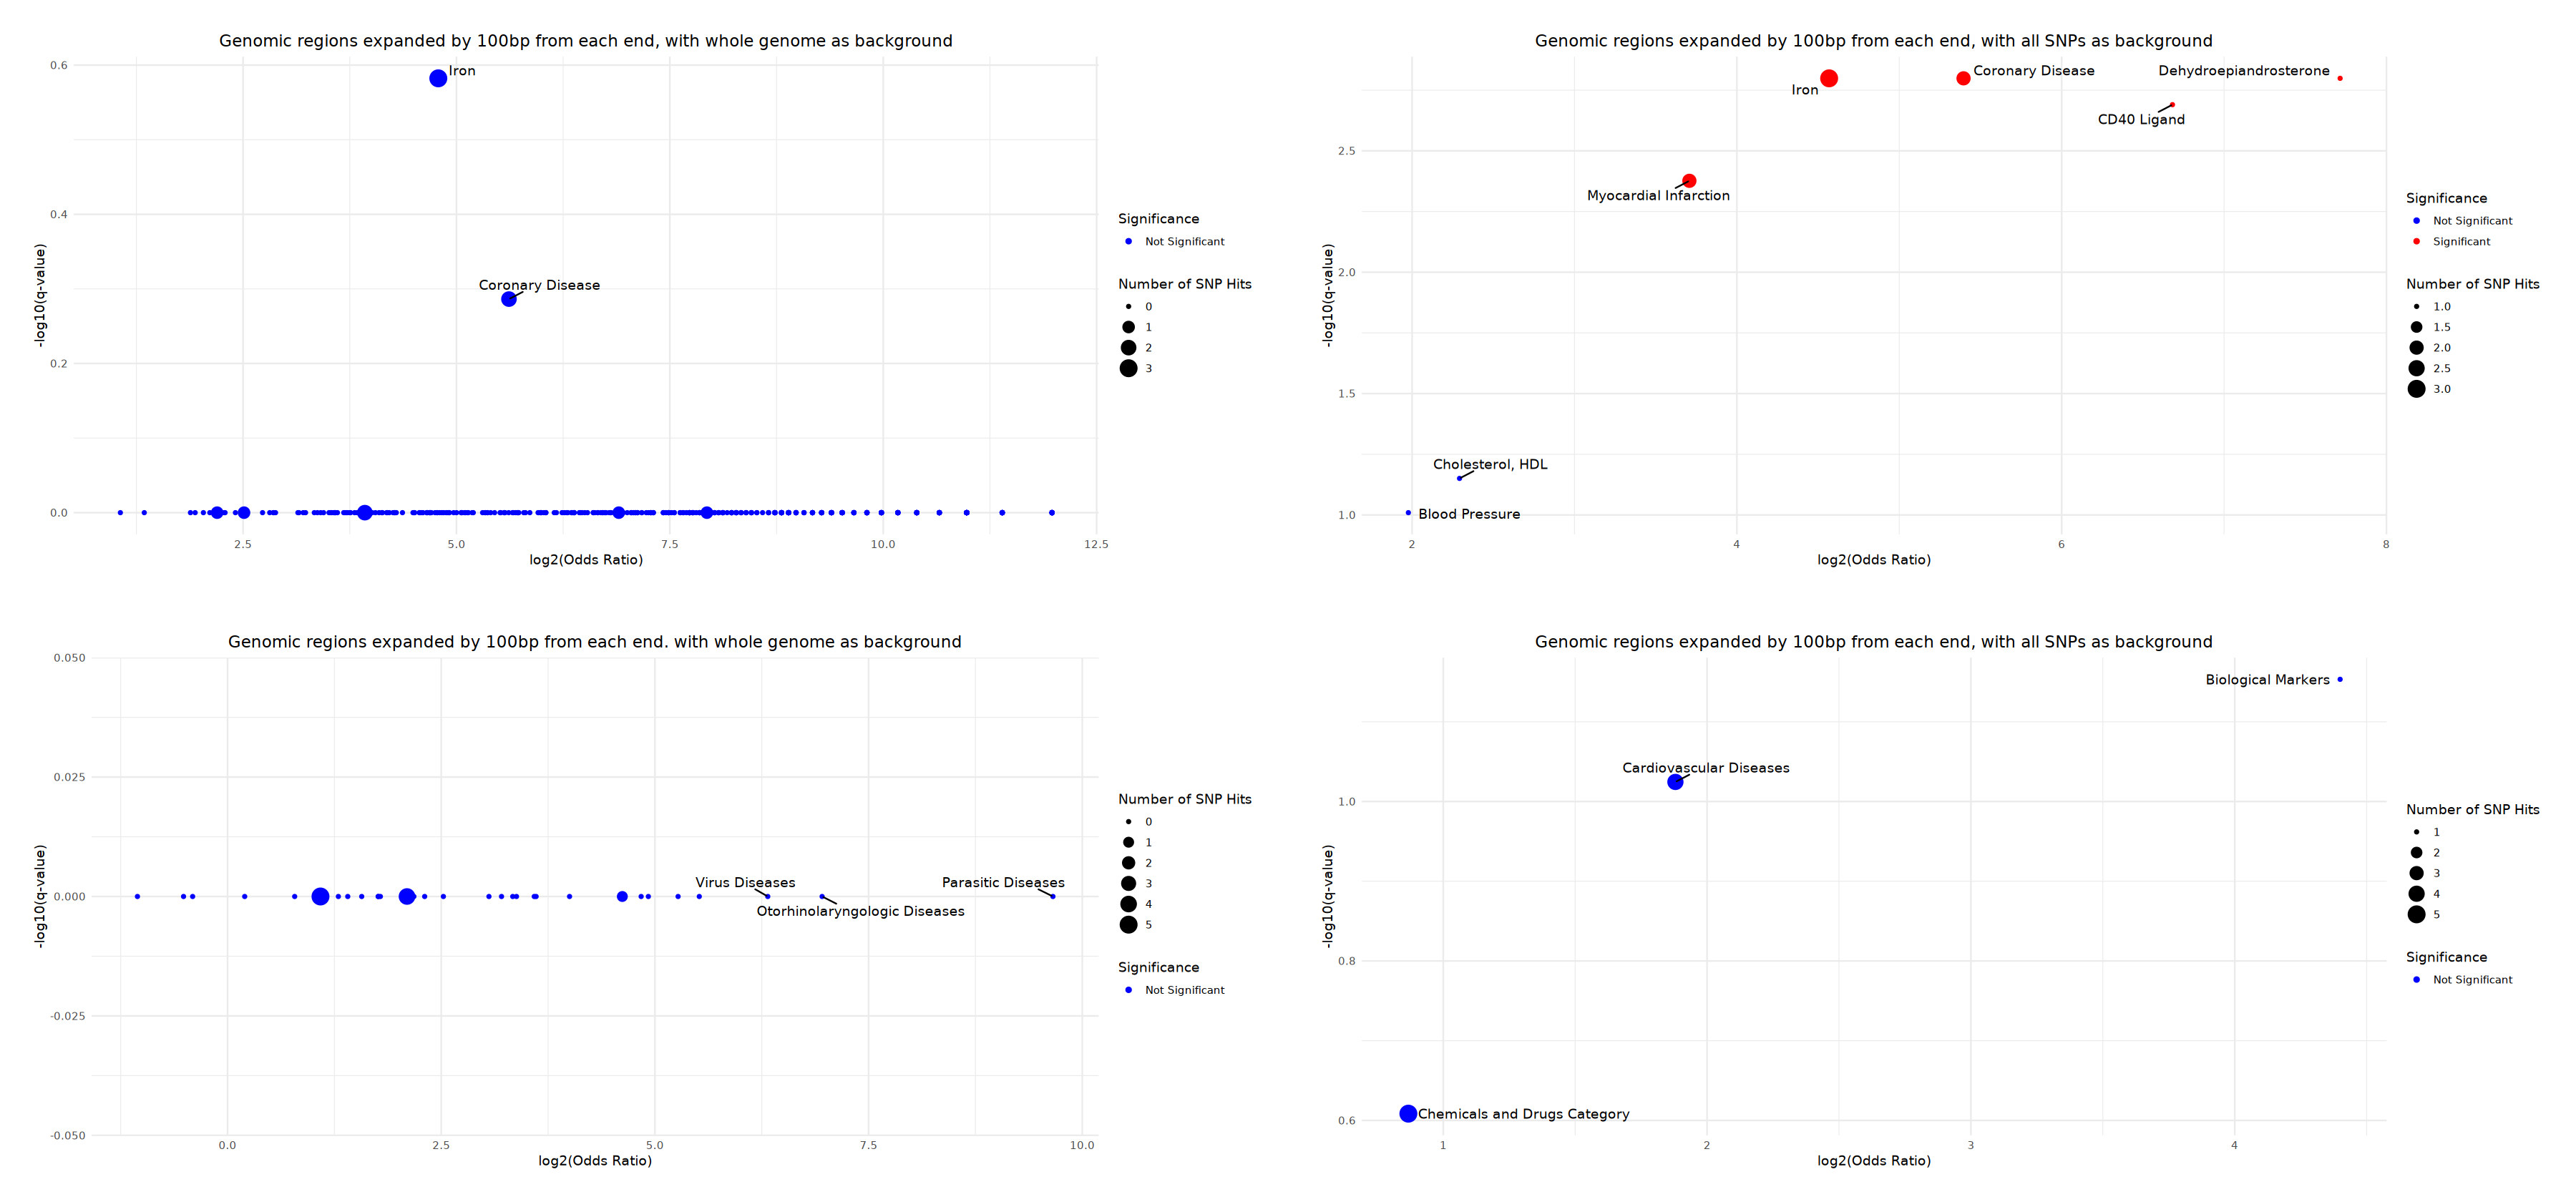

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




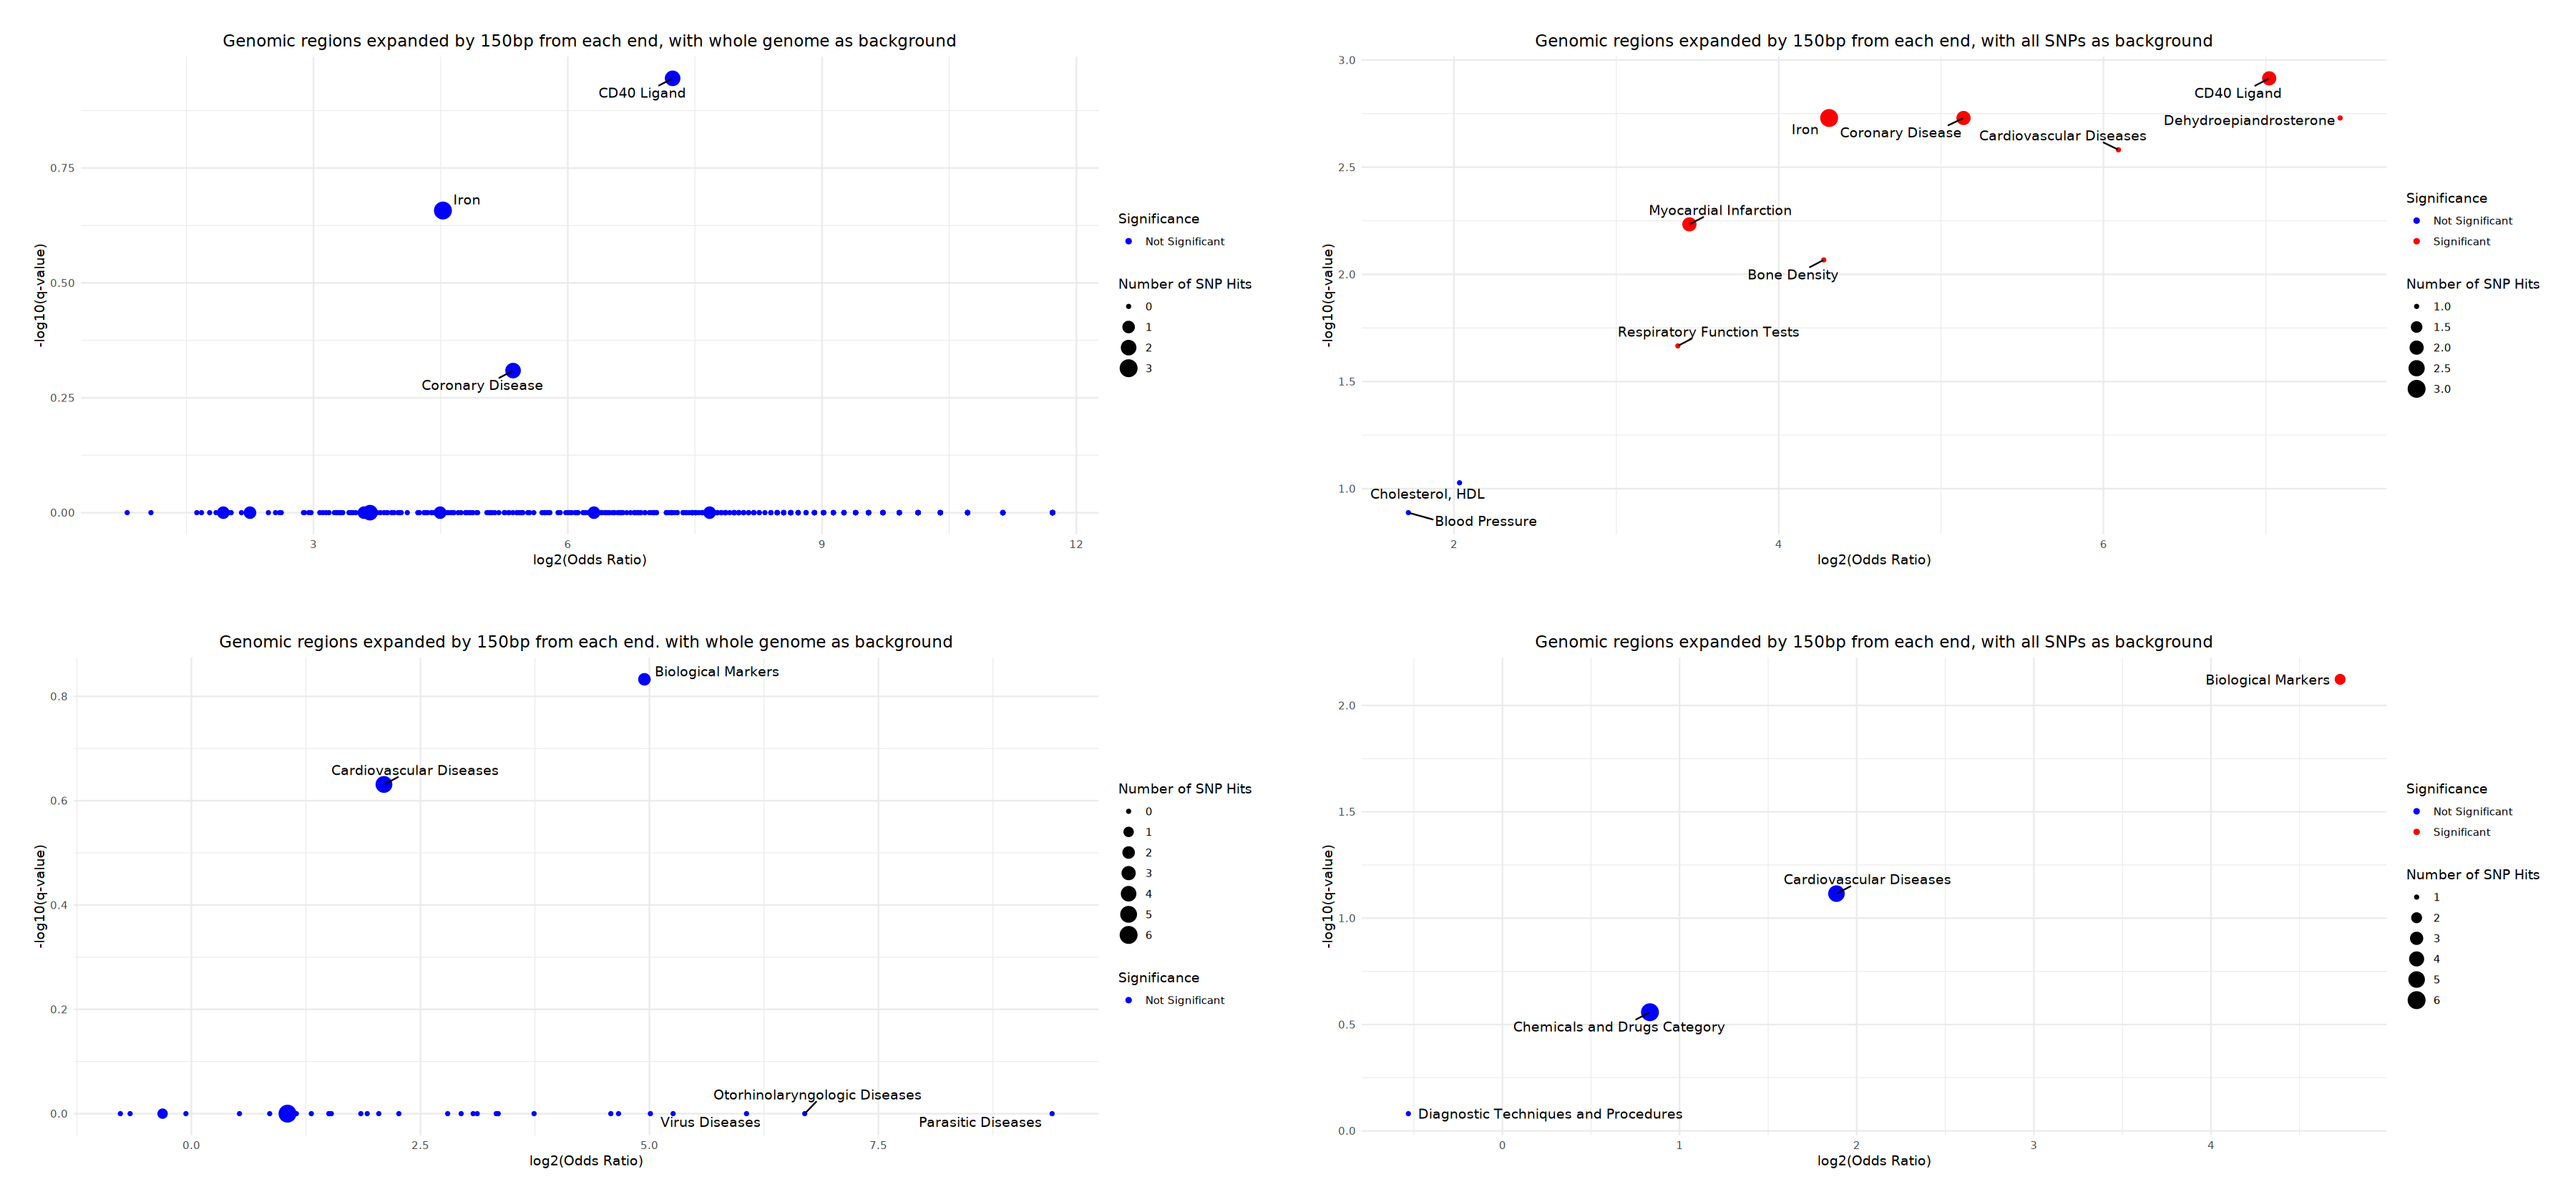

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




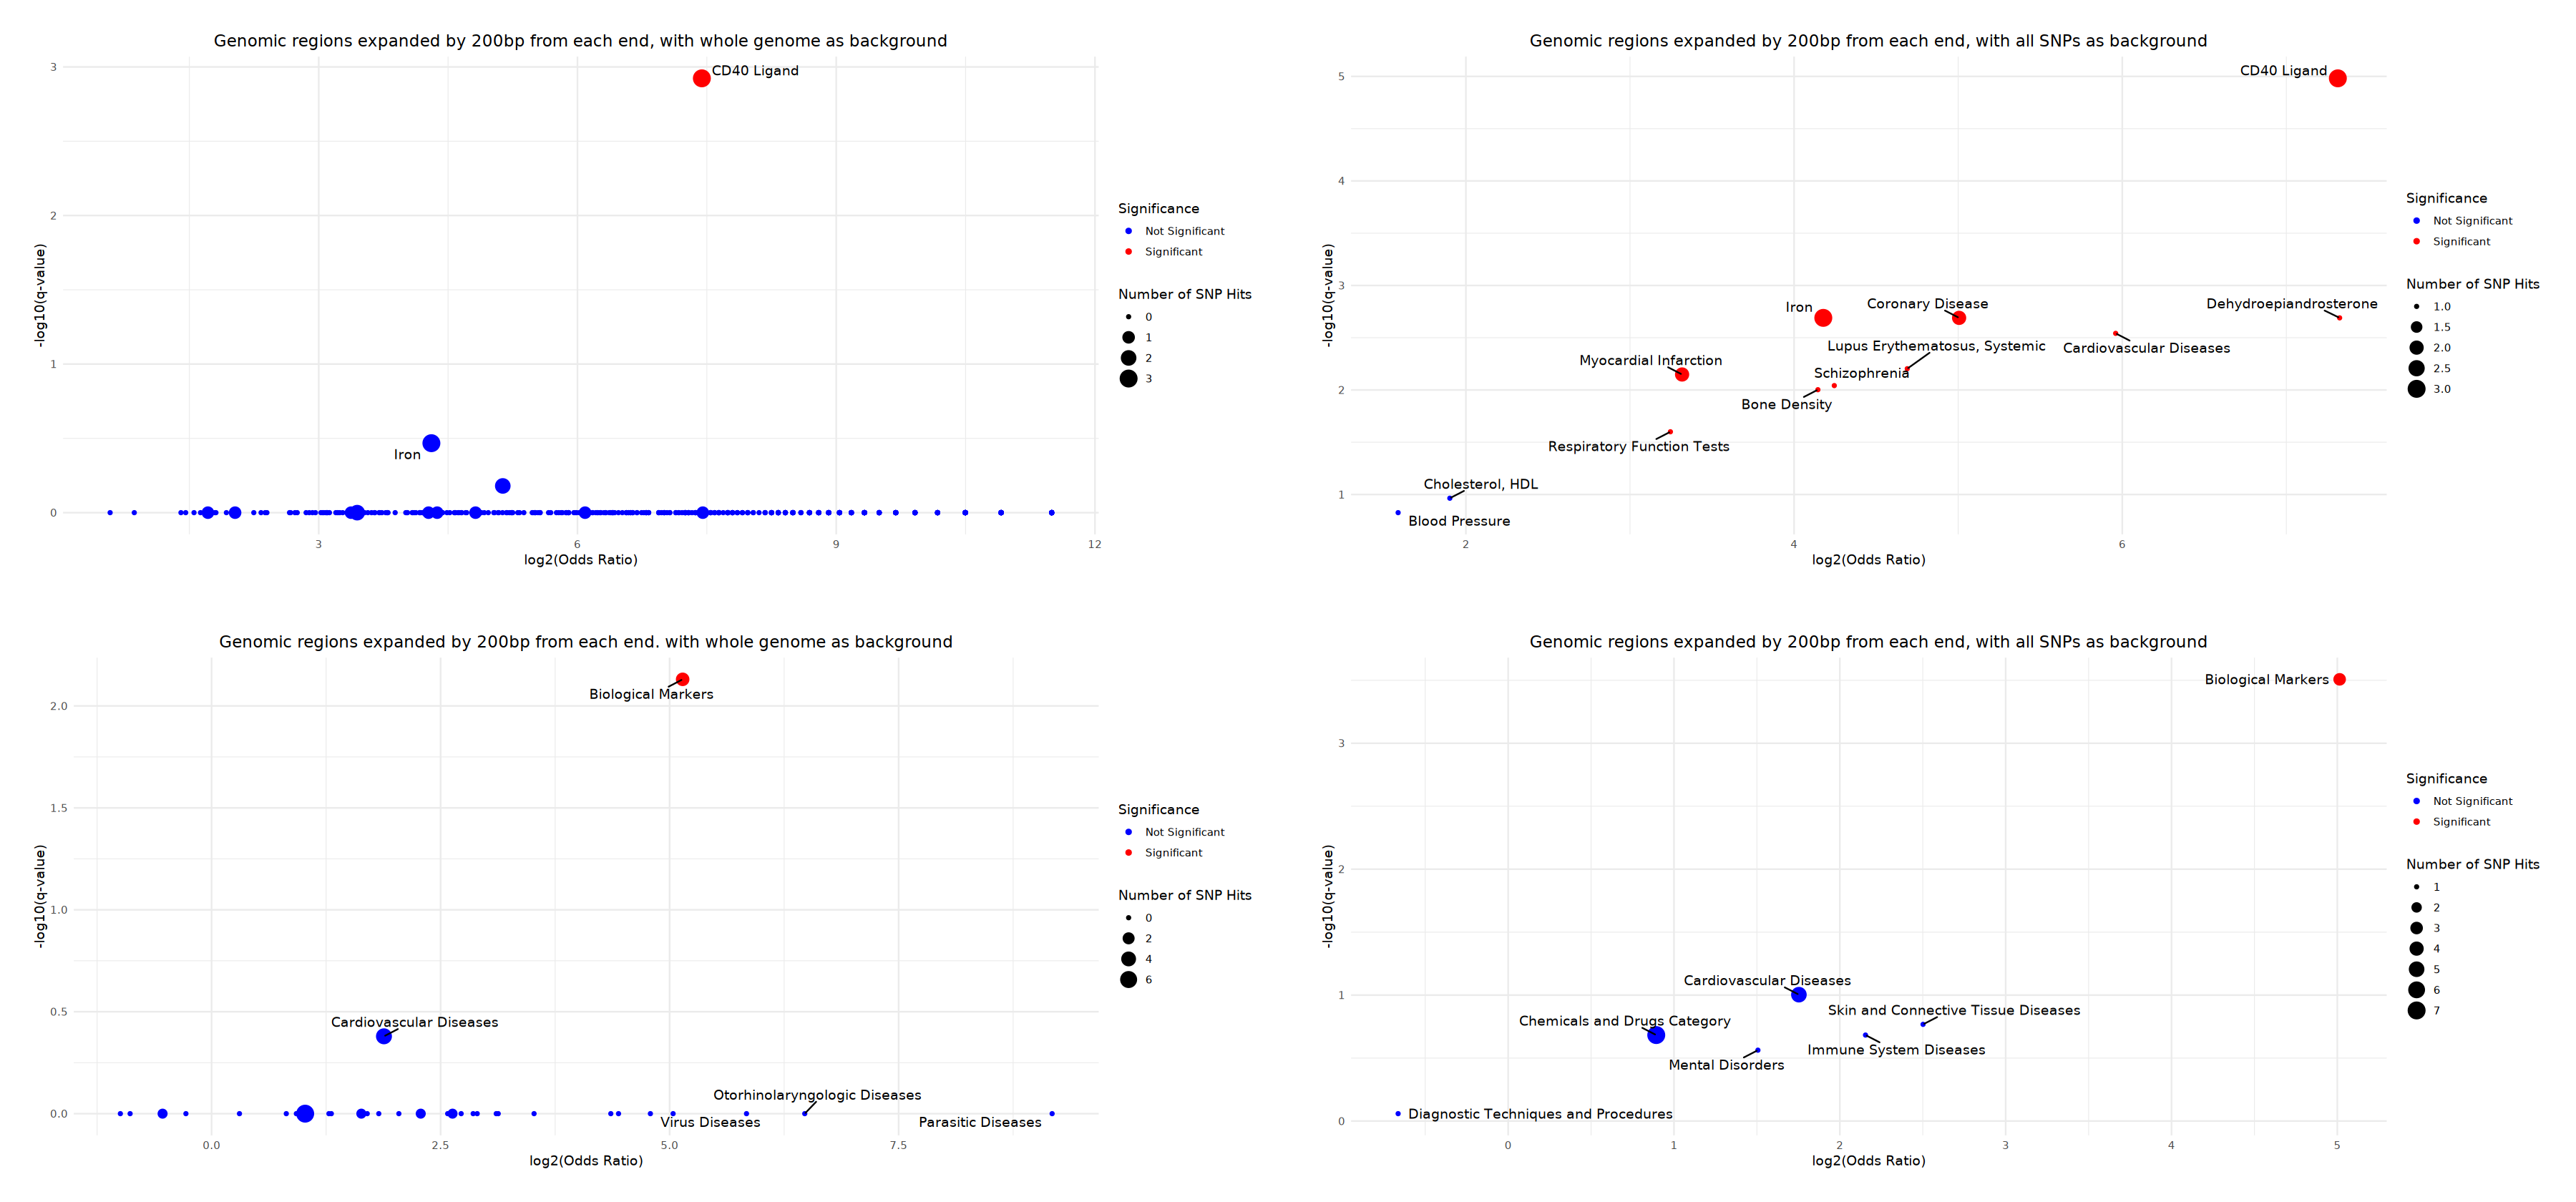

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




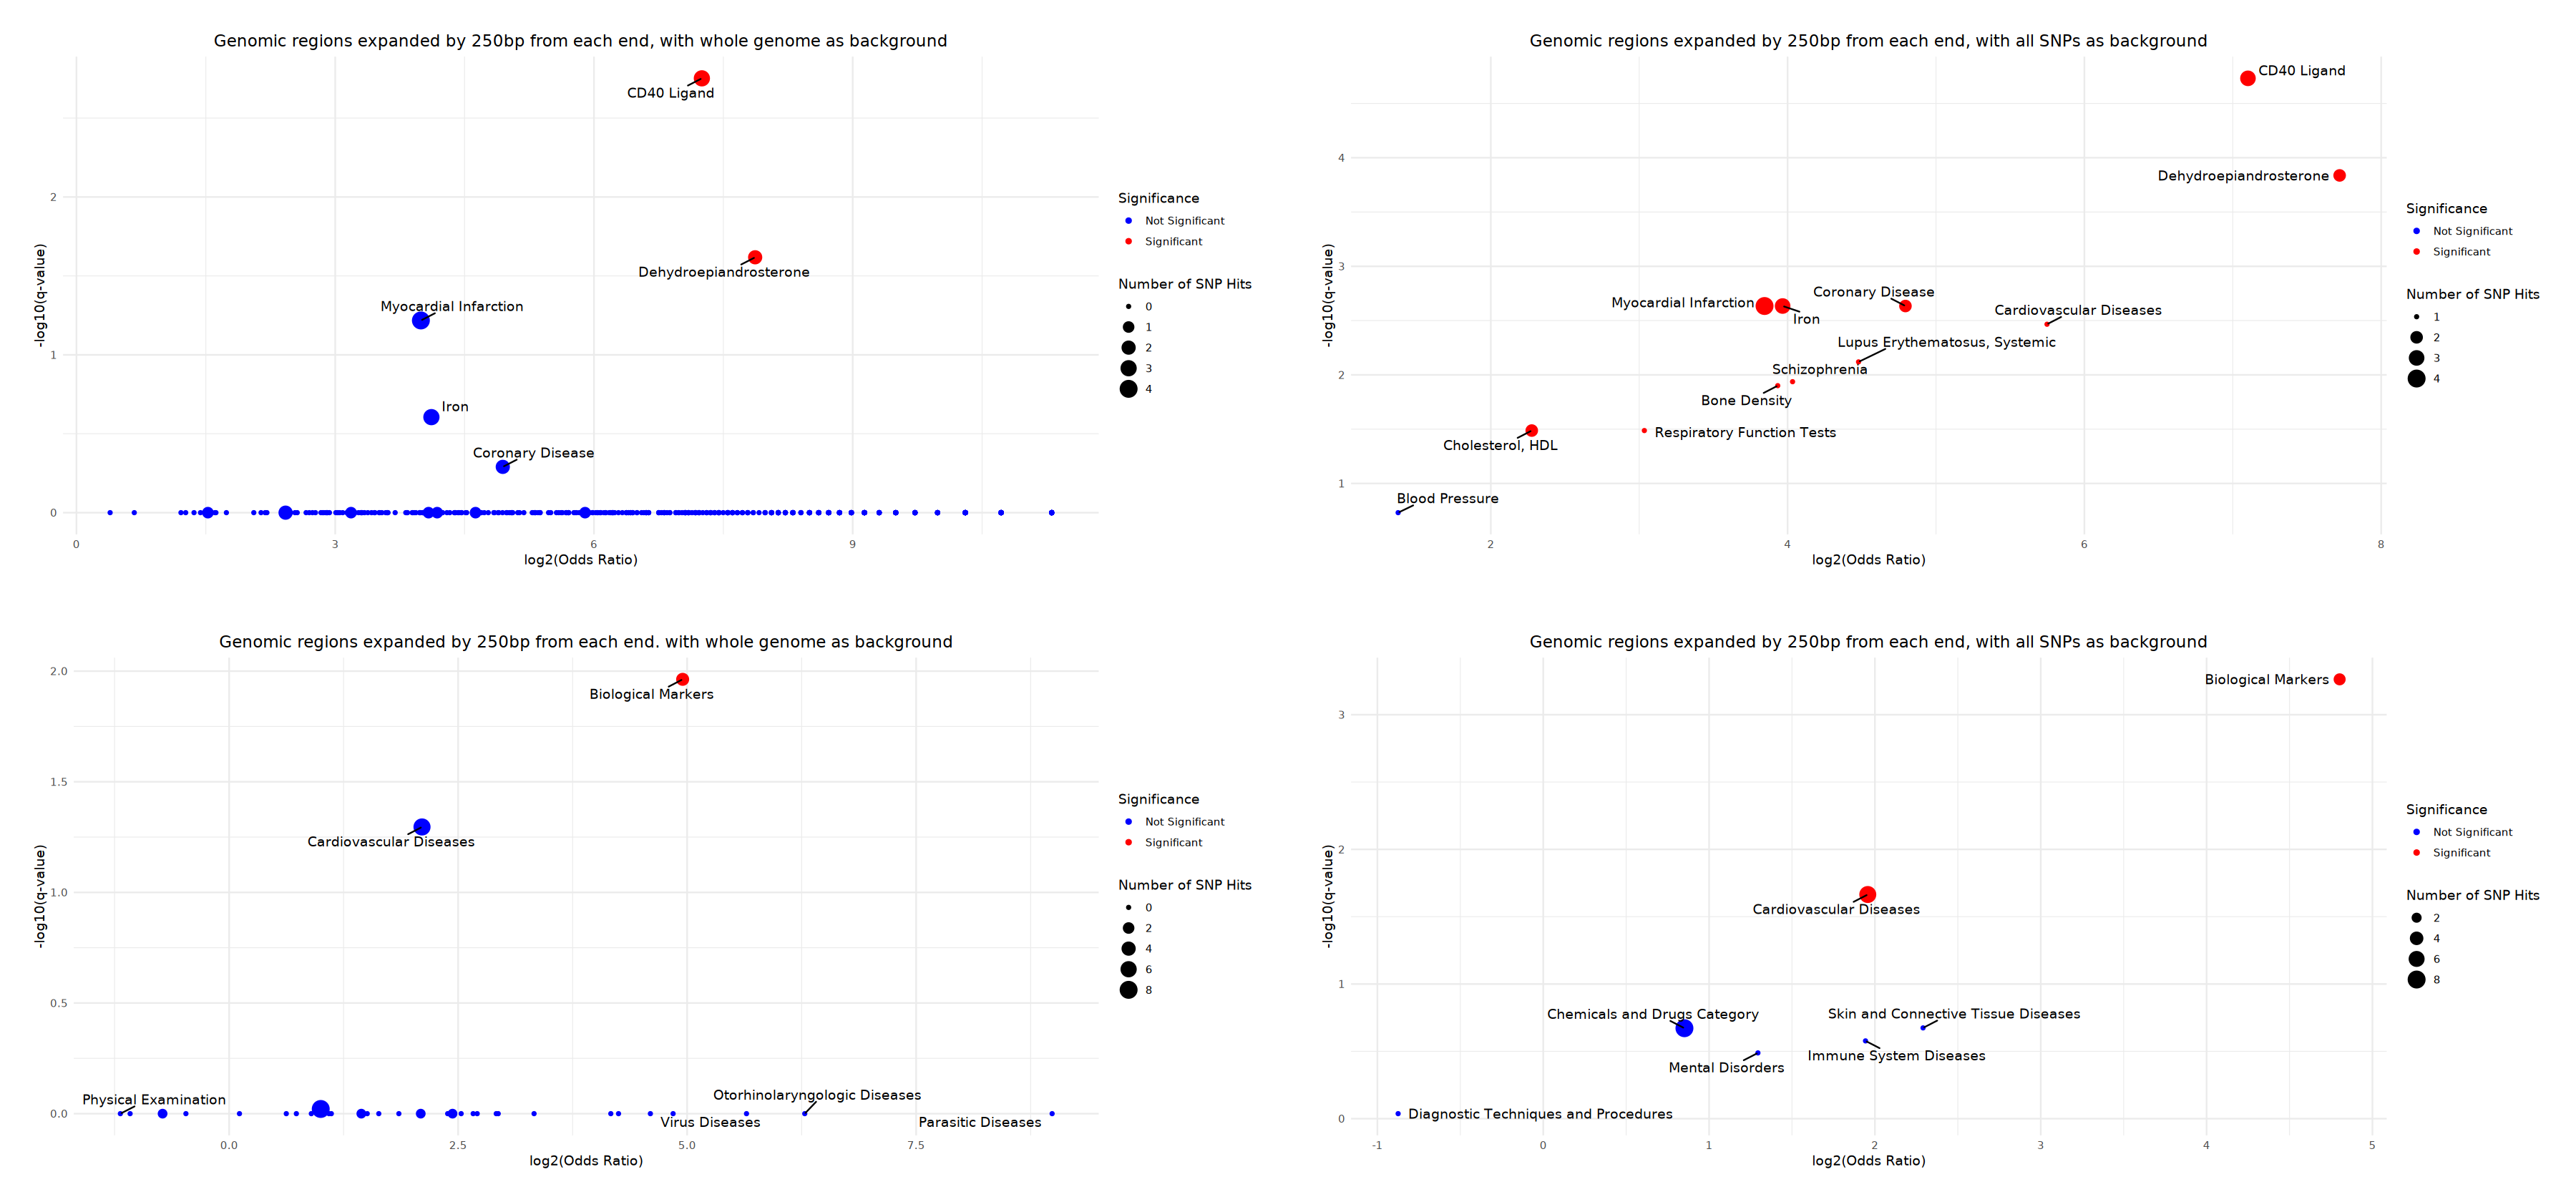

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




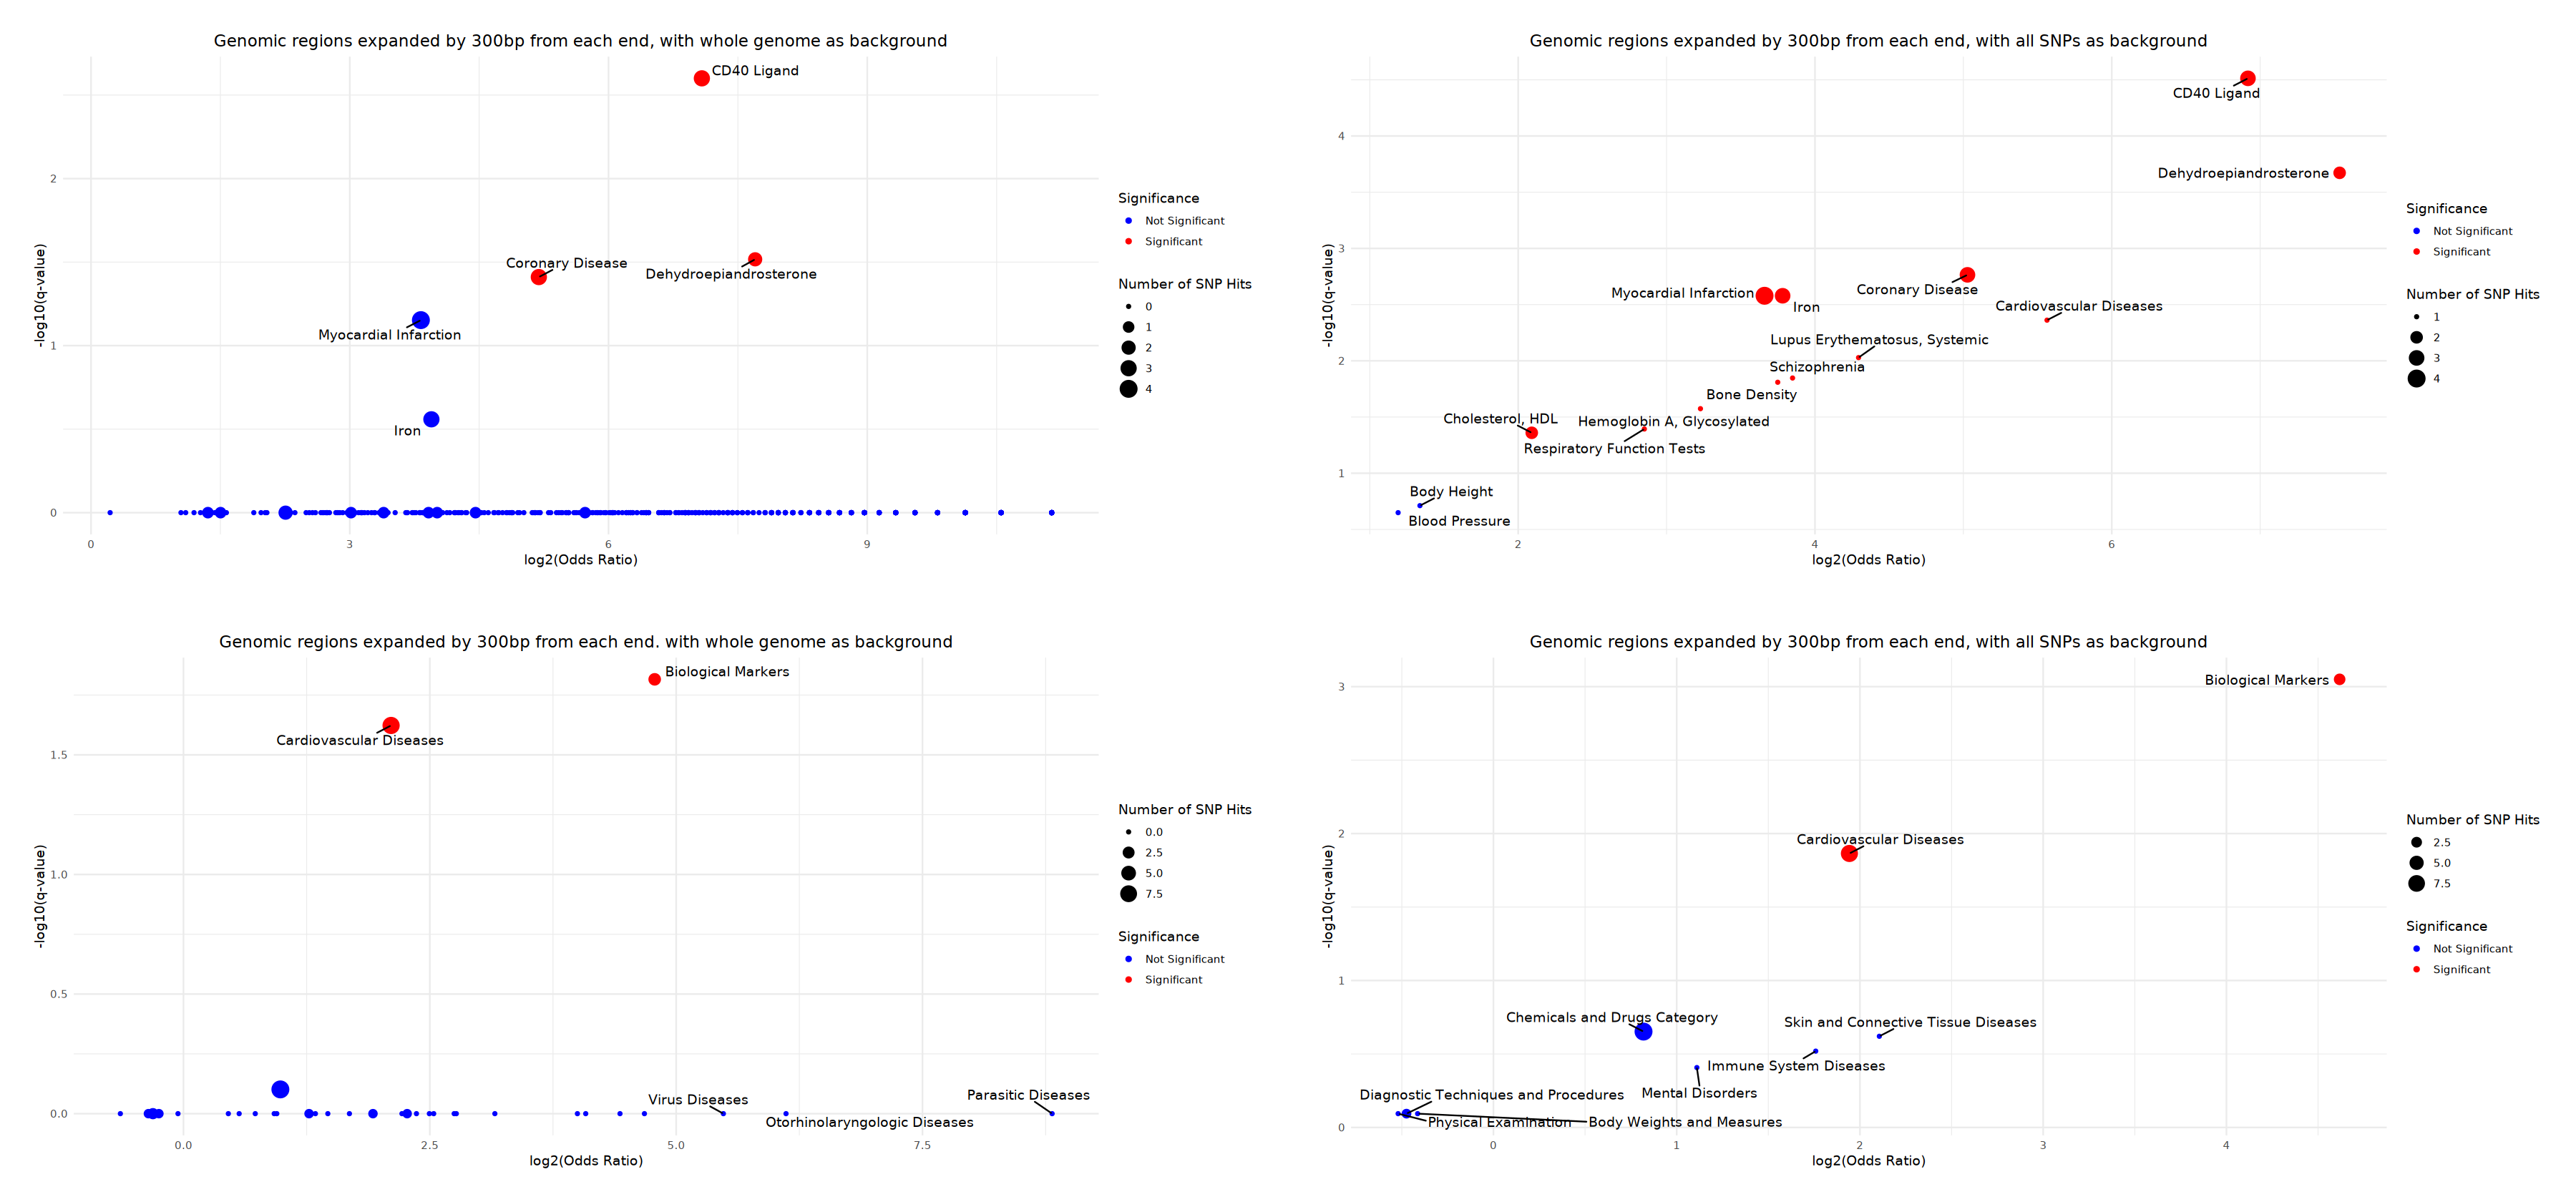

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




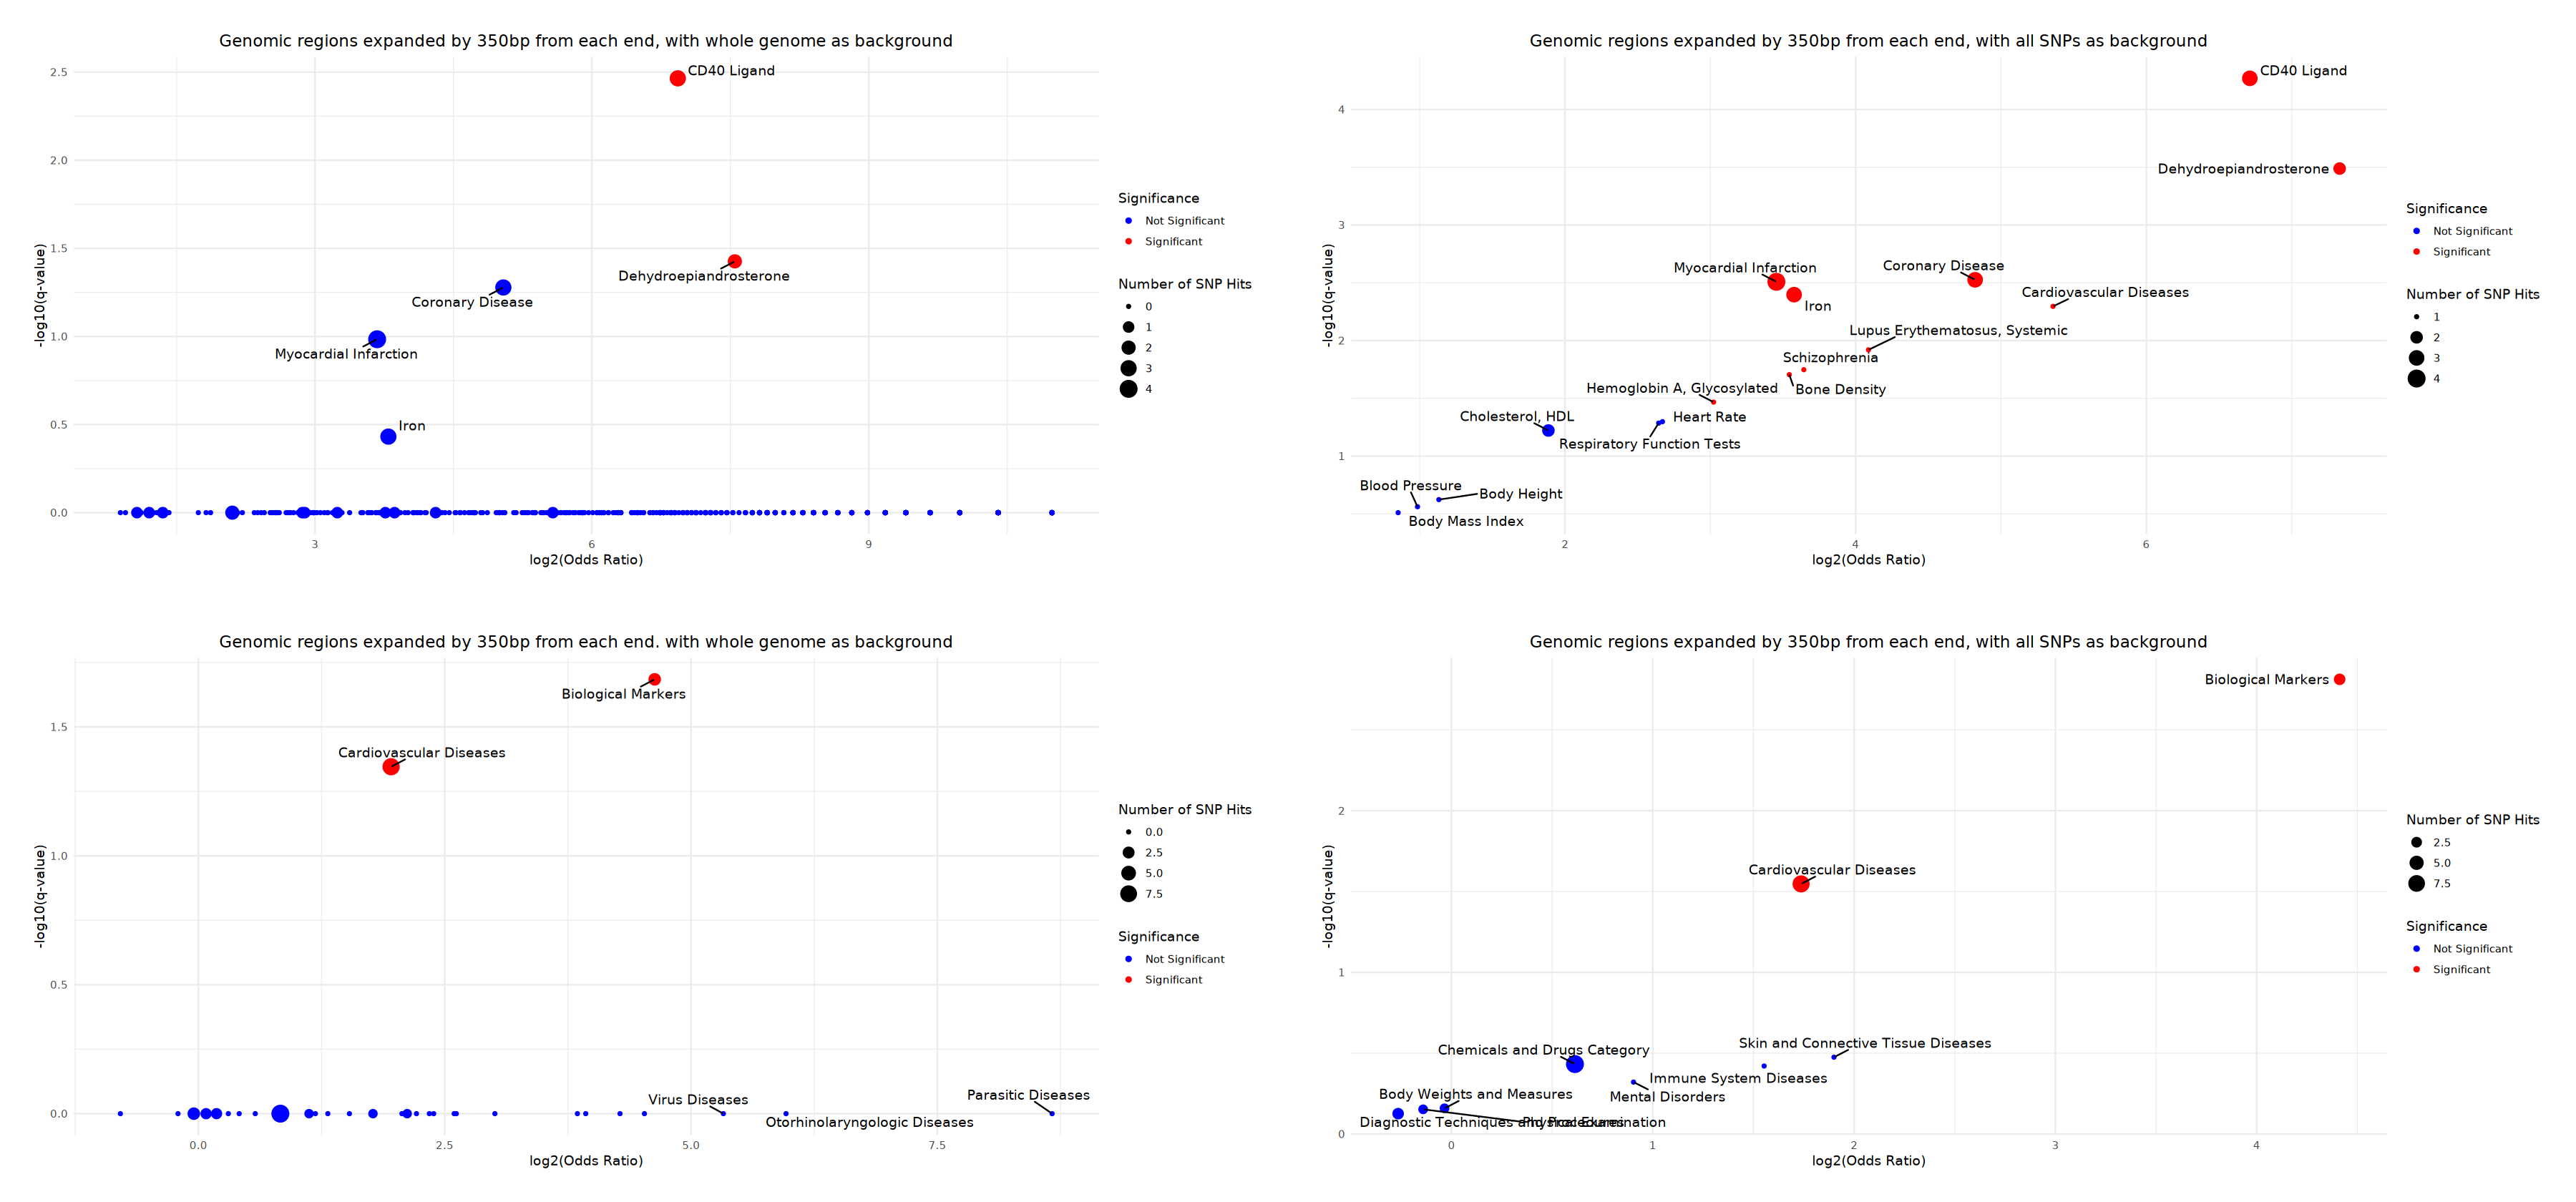

Using whole genome as background in the statistical analysis....  




Using all known SNPs as background in the statistical analysis....  




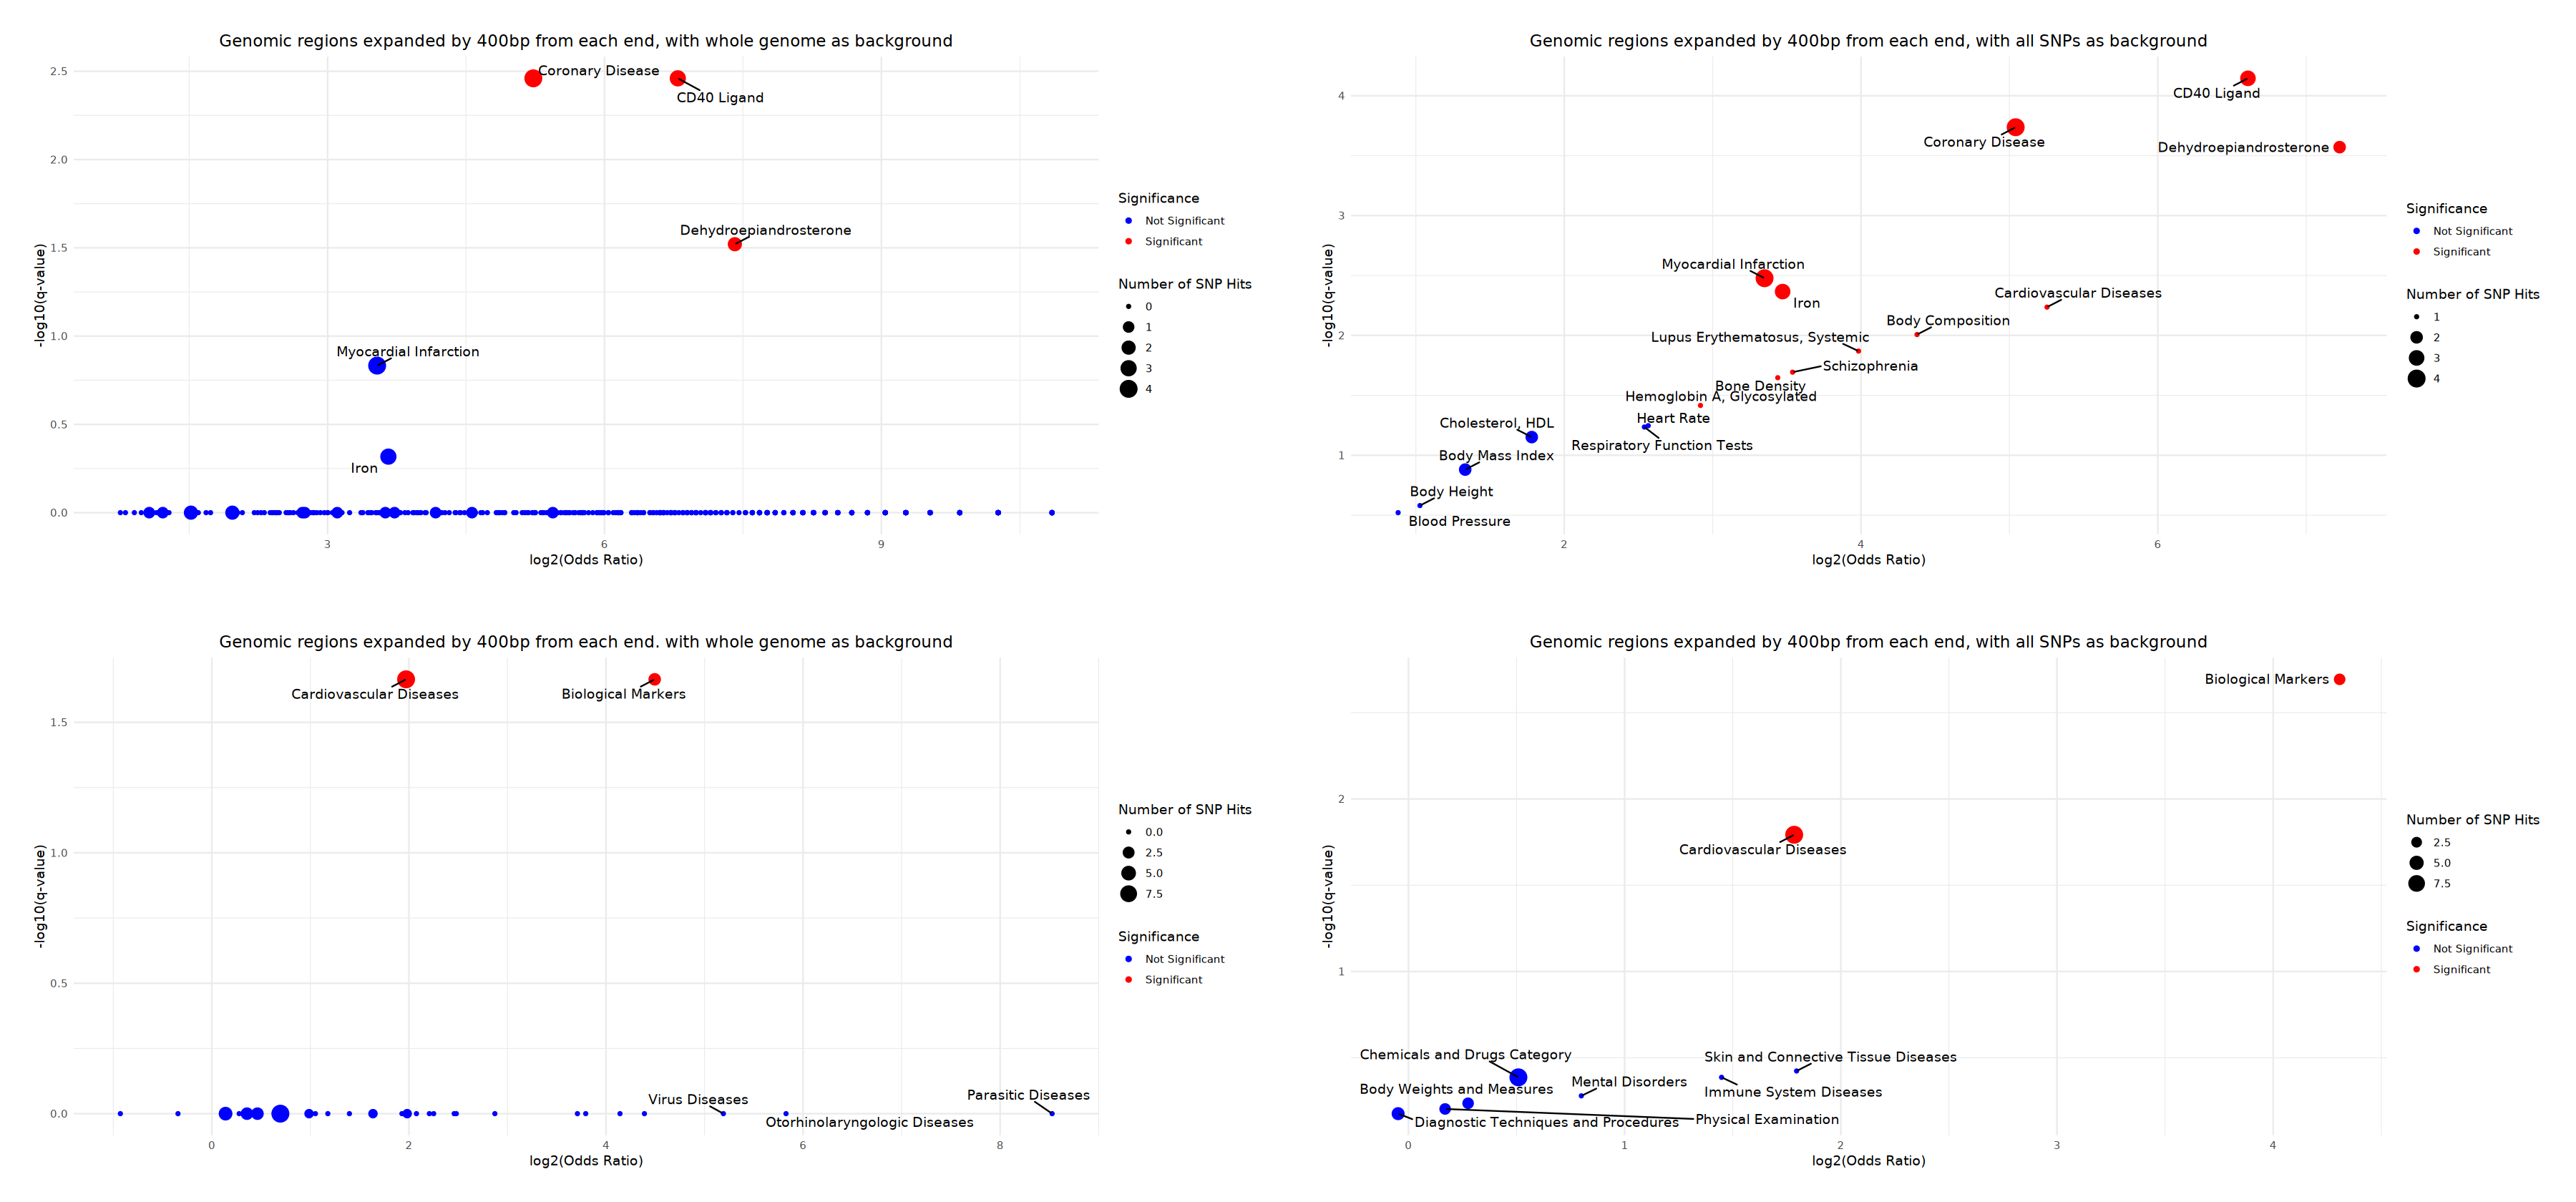

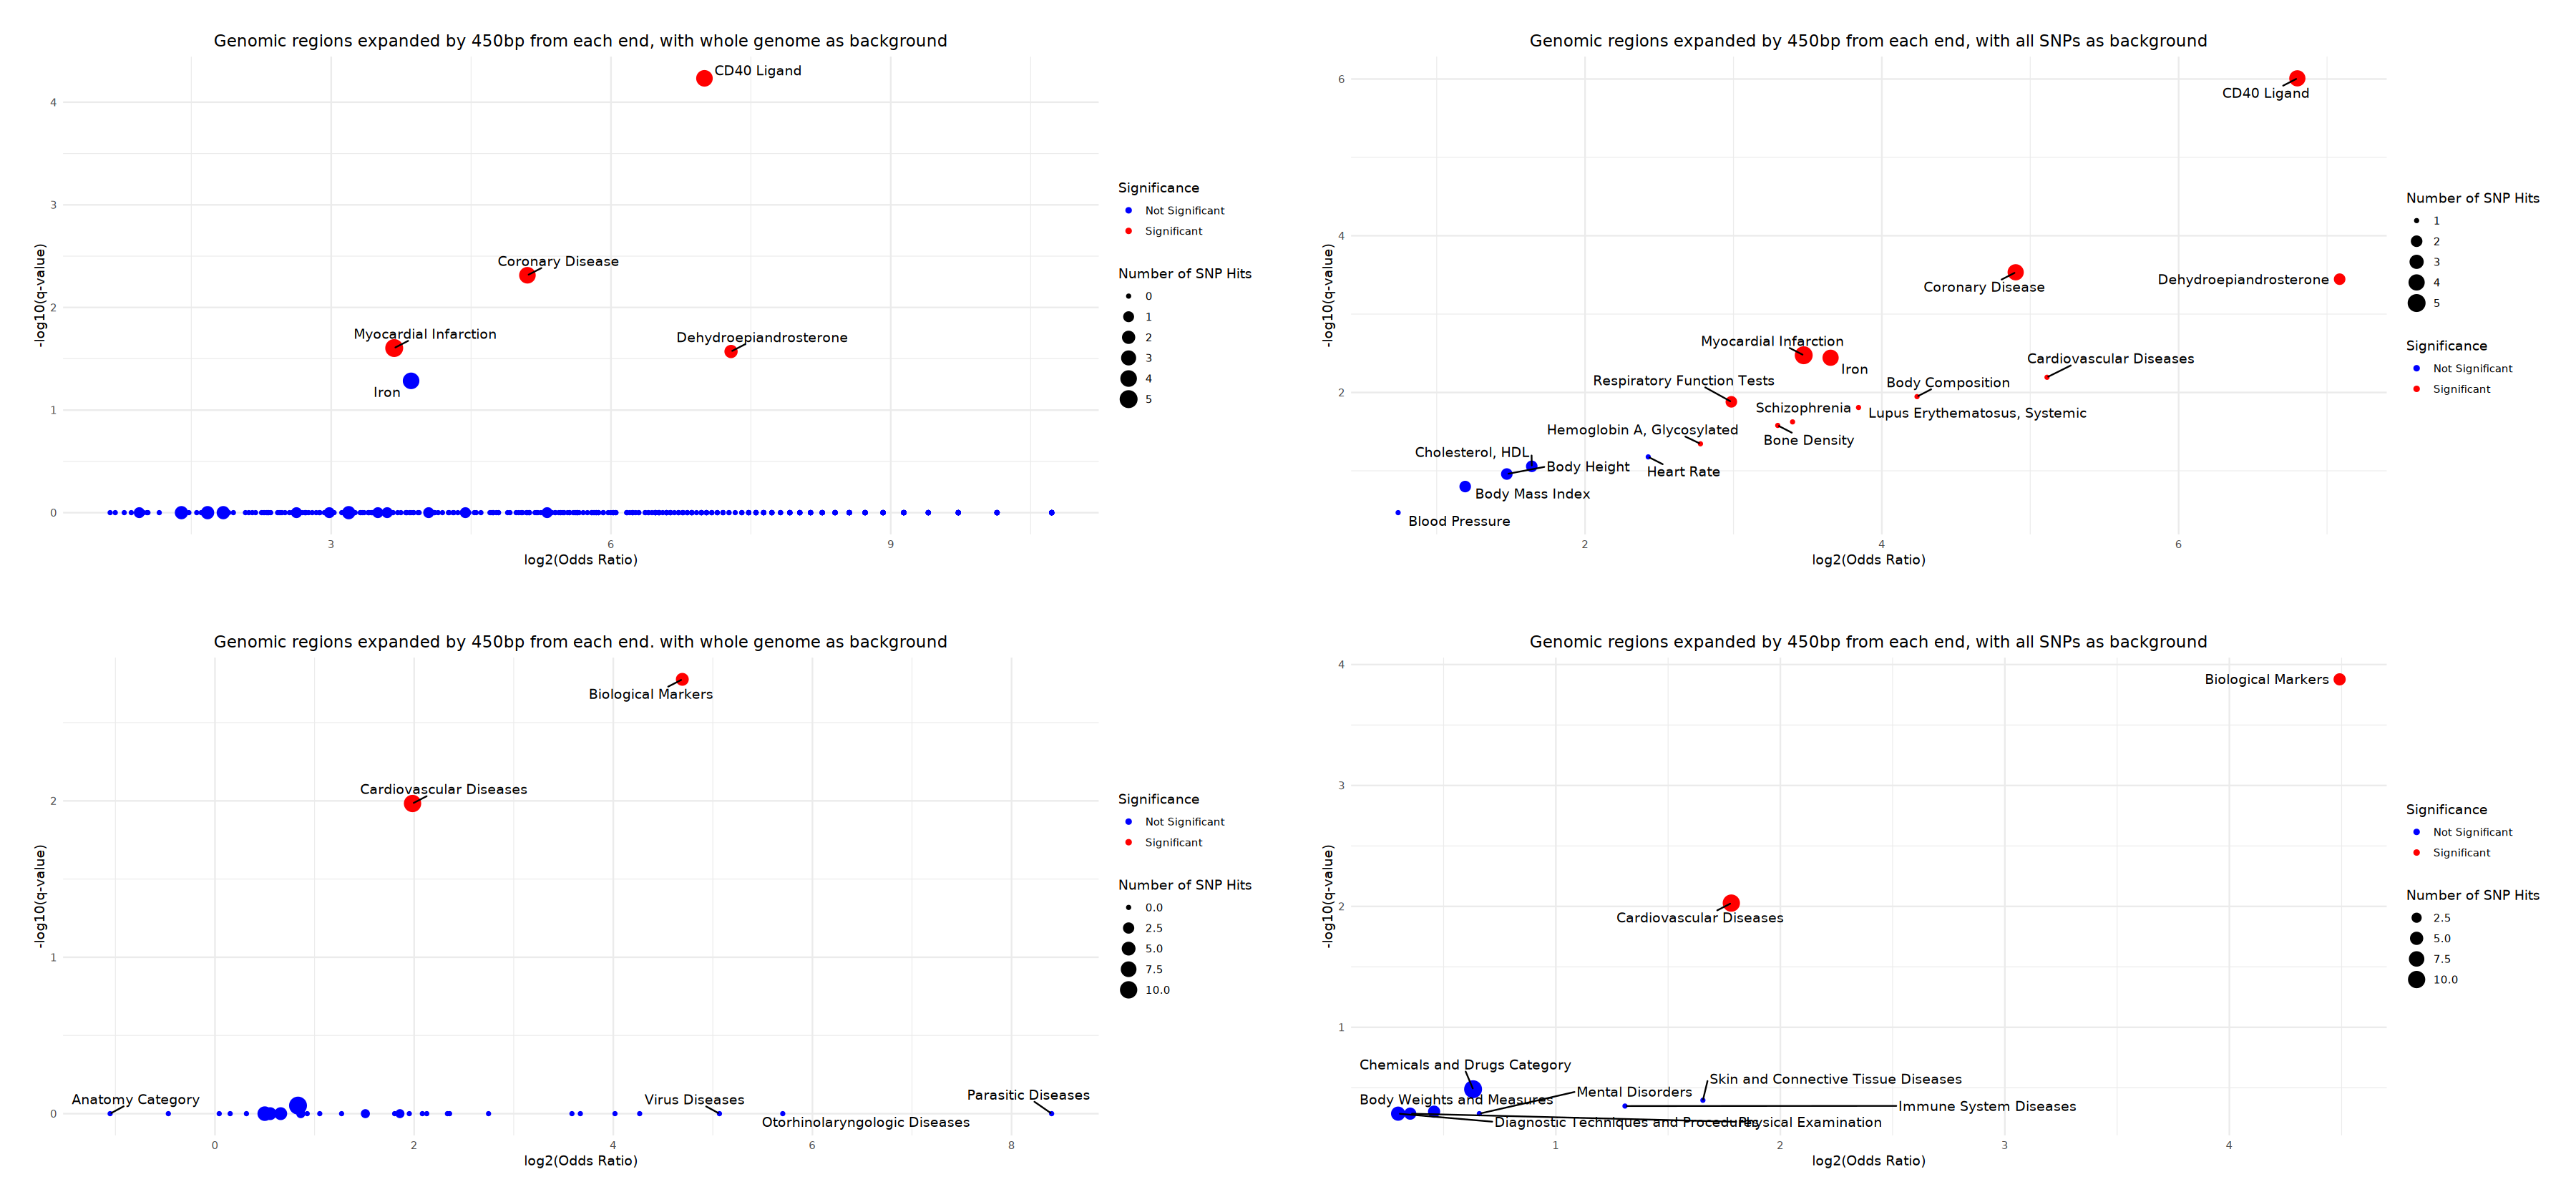

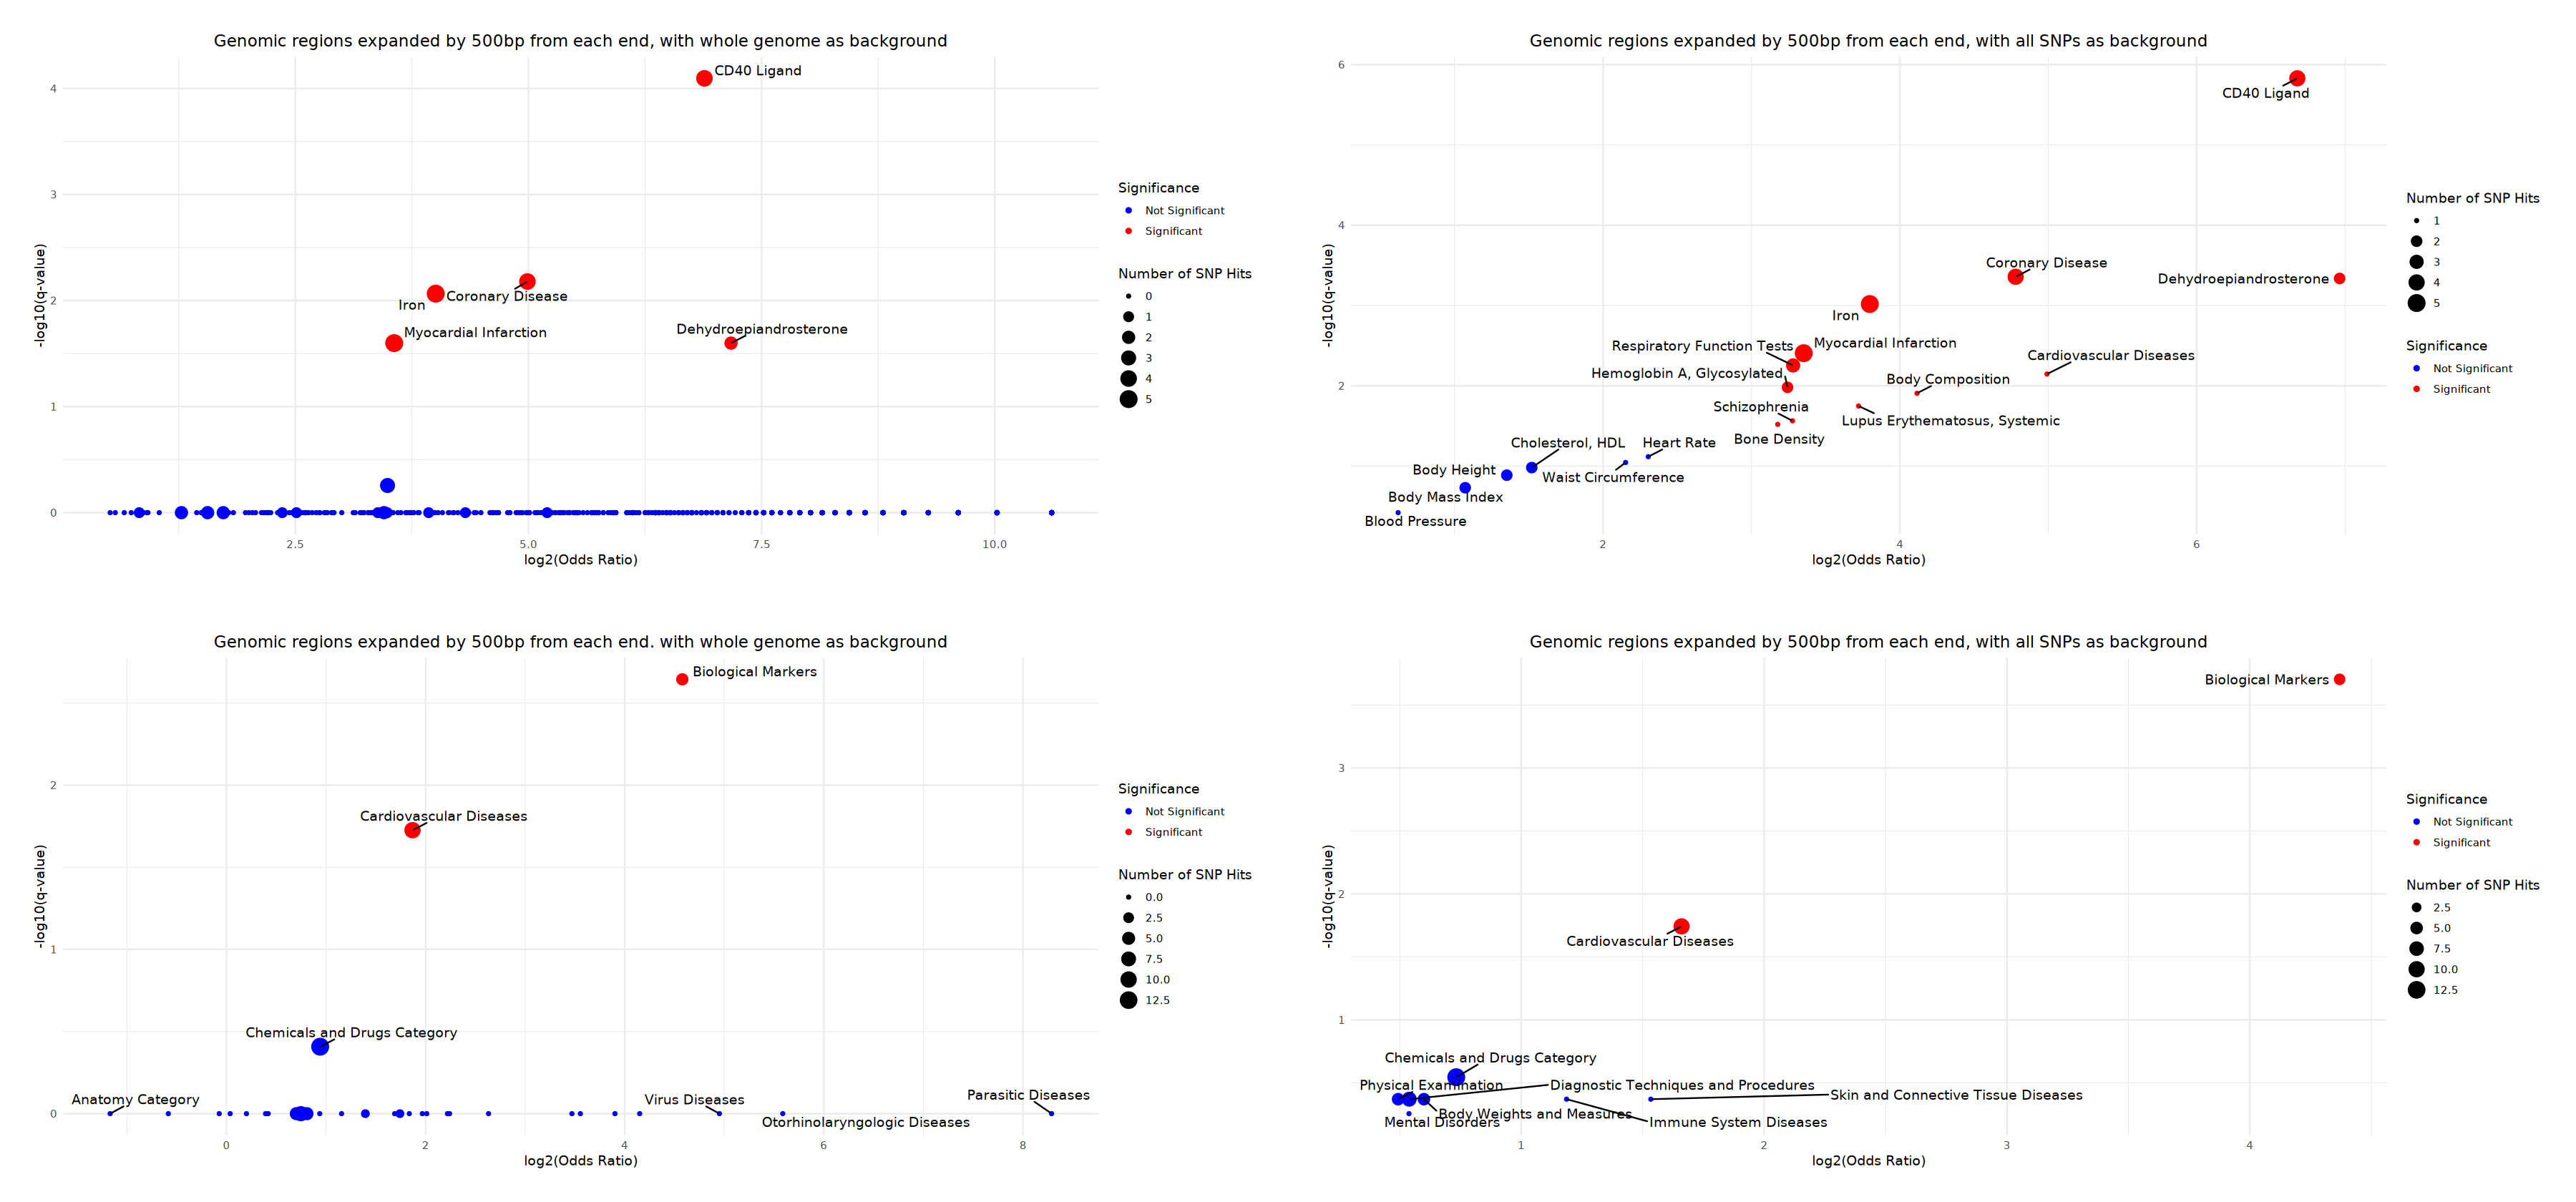

In [97]:
res_list <- list()

for(expansion_bases in seq(from = 50, to = 500, by = 50)) {
    
    res_list[[paste0('expanded_by_', expansion_bases, 'bp')]] <- 
    enrich_SNP_generic(granges_obj = EC_eGRN_regions_min1,
                       expand_by = expansion_bases,
                       SNPs = taSNPLD,
                       suppress_messages = TRUE)
    
    cat('\n')

    plot_for_diff_expansions(enriched_SNP_obj = res_list[[paste0('expanded_by_', expansion_bases, 'bp')]], expansion_value_string = paste0(expansion_bases, 'bp'))

    
    }

In [99]:
res_list %>% names %>% print

 [1] "expanded_by_50bp"  "expanded_by_100bp" "expanded_by_150bp"
 [4] "expanded_by_200bp" "expanded_by_250bp" "expanded_by_300bp"
 [7] "expanded_by_350bp" "expanded_by_400bp" "expanded_by_450bp"
[10] "expanded_by_500bp"


In [100]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mvbj21lcf387dgs04d29n0sxrydq03a6-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] traseR_1.34.0                     BSgenome.Hsapiens.UCSC.hg19_1.4.3
 [3] BSgenome_1.72.0                   rtracklayer_1.64.0               
 [5] BiocIO_1.14.0             